# Introduction
The U.S. Department of Education keeps various records over universities' athletic departments.

Gender equity in sports is a commonly discussed topic. It's important to consider how we can work to create a more equitable system. As an educational institution, the U.S. Department of Education can gain benefits from seeking to explore the public college system's distribution of finances in a data-driven manner.

We are focused on 4-year public universites in the United States with a student enrollment count greater than 10,000 for a total of 170 institutions.

# Hypothesis

**H0:**
On average, public 4-year universities spend the same ratio of funds on women’s teams as men’s teams when normalized by the revenue to total revenue ratio that each team brings to the university.

**Ha:**
On average, public 4-year universities do not spend the same ratio of funds on women’s teams as men’s teams when normalized by the revenue that each team brings to the university.

# Data
The data comes from the **Equity in Athletics Data Analysis Tool**, provided by the Office of Postsecondary Education of the U.S. Department of Education. There are some initial missing values in the DataFrames we'll be working with, such as the Basketball Coed Team Expenses for Appalachian State University. These values and others in the revenue DataFrame show that the college does not have that type of team (men's, women's, coed). They can be set to zero without any bias implications.


Originally, six .csv files were downloaded. However, through exploration and clarification from the data analysis tool, it is more efficient to only use two of them: the expenses and revenue files for 2018. When combined, these two .csv files contain 170 rows (the number of colleges) and 168 columns (institution name, ID #, number of undergraduates, every sport type expenses/revenue by gender and coed, and totals for expenses/revenue) each.

The first 5 rows of both the expenses and revenue DataFrames are shown below in the first 2 cells of this section.

In [ ]:
## Let's get some stuff imported and setup our environment.

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
pd.options.mode.chained_assignment = None
warnings.simplefilter(action = 'ignore', category = FutureWarning)
plt.rcParams.update({'figure.max_open_warning':0})
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
## Here are the datasets.

## Athletically Related Student Aid
student_aid_file = r'/drive/MyDrive/Capstone.1/Dataset/Athletics.Student.Aid'
student_aid_df = pd.read_csv(student_aid_file)

## "" Participation
participation_file = r'/drive/MyDrive/Capstone.1/Dataset/Athletics.Participation.csv'
participation_df = pd.read_csv(participation_file)

## "" Expenses
expenses_file = r'/drive/MyDrive/Capstone.1/Dataset/Athletics.Expenses.csv'
expenses_df = pd.read_csv(expenses_file)

## "" Recruiting Expenses
recruiting_file = r'/drive/MyDrive/Capstone.1/Dataset/Athletics.Recruiting.Expenses.csv'
recruiting_df = pd.read_csv(recruiting_file)

## "" Revenue
revenue_file = r'/drive/MyDrive/Capstone.1/Dataset/Athletics.Revenue.csv'
revenue_df = pd.read_csv(revenue_file)

## Game Day/Operating Expenses
operating_file = r'/drive/MyDrive/Capstone.1/Dataset/Game.Day.Operating.Expenses.csv'
operating_df = pd.read_csv(operating_file)

In [ ]:
## Let's explore using .info()

print("Student Aid\r\n")
print(student_aid_df.info())
print("\r\nParticipation Information\r\n")
print(participation_df.info())
print("\r\nExpenses Information\r\n")
print(expenses_df.info())
print("\r\nRecruiting Expenses Information\r\n")
print(recruiting_df.info())
print("\r\nRevenue Information\r\n")
print(revenue_df.info())
print("\r\nOperating Expenses Information\r\n")
print(operating_df.info())

Student Aid

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Survey Year                        1520 non-null   int64  
 1   UNITID                             1520 non-null   int64  
 2   Institution Name                   1520 non-null   object 
 3   State CD                           1520 non-null   object 
 4   Classification Name                1520 non-null   object 
 5   Classification Other               0 non-null      float64
 6   Sanction Code                      1520 non-null   int64  
 7   Sanction Name                      1520 non-null   object 
 8   Male Undergraduates                1520 non-null   int64  
 9   Female Undergraduates              1520 non-null   int64  
 10  Total Undergraduates               1520 non-null   int64  
 11  Men's Team Athletic Student Aid    1520 non

In [ ]:
## Let's explore using .head()

student_aid_df.head()

,Survey Year,UNITID,Institution Name,State CD,Classification Name,Classification Other,Sanction Code,Sanction Name,Male Undergraduates,Female Undergraduates,Total Undergraduates,Men's Team Athletic Student Aid,Women's Team Athletic Student Aid,Coed Team Athletic Student Aid
0,2018,197869,Appalachian State University,NC,NCAA Division I-FBS,NaN,1,NCAA,7211,9146,16357,4407026,2473586,NaN
1,2018,104151,Arizona State University-Tempe,AZ,NCAA Division I-FBS,NaN,1,NCAA,21732,17473,39205,8532861,6379895,NaN
2,2018,100858,Auburn University,AL,NCAA Division I-FBS,NaN,1,NCAA,11183,11053,22236,8807314,7352381,NaN
3,2018,150136,Ball State University,IN,NCAA Division I-FBS,NaN,1,NCAA,5922,8662,14584,4162975,3982689,NaN
4,2018,196079,Binghamton University,NY,NCAA Division I without football,NaN,1,NCAA,6826,6801,13627,2255421,2490986,NaN


In [ ]:
participation_df.head()

,Survey Year,UNITID,Institution Name,State CD,Classification Name,Classification Other,Sanction Code,Sanction Name,Male Undergraduates,Female Undergraduates,Total Undergraduates,Archery Men's Team Participation,Archery Women's Team Participation,Archery Coed Team Men Participation,Archery Coed Team Women Participation,Archery Total Participation,Badminton Men's Team Participation,Badminton Women's Team Participation,Badminton Coed Team Men Participation,Badminton Coed Team Women Participation,Badminton Total Participation,Baseball Men's Team Participation,Baseball Women's Team Participation,Baseball Coed Team Men Participation,Baseball Coed Team Women Participation,Baseball Total Participation,Basketball Men's Team Participation,Basketball Women's Team Participation,Basketball Coed Team Men Participation,Basketball Coed Team Women Participation,Basketball Total Participation,Beach Volleyball Men's Team Participation,Beach Volleyball Women's Team Participation,Beach Volleyball Coed Team Men Participation,Beach Volleyball Coed Team Women Participation,Beach Volleyball Total Participation,Bowling Men's Team Participation,Bowling Women's Team Participation,Bowling Coed Team Men Participation,Bowling Coed Team Women Participation,...,Track and Field Outdoor Coed Team Women Participation,Track and Field Outdoor Total Participation,Track and Field X Country Men's Team Participation,Track and Field X Country Women's Team Participation,Track and Field X Country Coed Team Men Participation,Track and Field X Country Coed Team Women Participation,Track and Field X Country Total Participation,Volleyball Men's Team Participation,Volleyball Women's Team Participation,Volleyball Coed Team Men Participation,Volleyball Coed Team Women Participation,Volleyball Total Participation,Water Polo Men's Team Participation,Water Polo Women's Team Participation,Water Polo Coed Team Men Participation,Water Polo Coed Team Women Participation,Water Polo Total Participation,Weight Lifting Men's Team Participation,Weight Lifting Women's Team Participation,Weight Lifting Coed Team Men Participation,Weight Lifting Coed Team Women Participation,Weight Lifting Total Participation,Wrestling Men's Team Participation,Wrestling Women's Team Participation,Wrestling Coed Team Men Participation,Wrestling Coed Team Women Participation,Wrestling Total Participation,Other Sports Men's Team Participation,Other Sports Women's Team Participation,Other Sports Coed Team Men Participation,Other Sports Coed Team Women Participation,Other Sports Total Participation,Total Men's Team Participation,Total Women's Team Participation,Total Coed Team Men Participation,Total Coed Team Women Participation,Grand Total Men's Participation,Grand Total Women's Participation,Unduplicated Count Men's Participation,Unduplicated Count Women's Participation
0,2018,197869,Appalachian State University,NC,NCAA Division I-FBS,NaN,1,NCAA,7211,9146,16357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,34.0,15.0,16.0,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,331,271,NaN,NaN,331,271,299,217
1,2018,104151,Arizona State University-Tempe,AZ,NCAA Division I-FBS,NaN,1,NCAA,21732,17473,39205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,31.0,18.0,38.0,NaN,NaN,56.0,NaN,20.0,NaN,NaN,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,25.0,NaN,21.0,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,35.0,NaN,14.0,NaN,NaN,14.0,390,370,NaN,NaN,390,370,339,320
2,2018,100858,Auburn University,AL,NCAA Division I-FBS,NaN,1,NCAA,11183,11053,22236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,38.0,19.0,21.0,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304,291,NaN,NaN,304,291,267,228
3,2018,150136,Ball

In [ ]:
expenses_df.head()

,Survey Year,UNITID,Institution Name,State CD,Classification Name,Classification Other,Sanction Code,Sanction Name,Male Undergraduates,Female Undergraduates,Total Undergraduates,Archery Men's Team Expenses,Archery Women's Team Expenses,Archery Coed Team Expenses,Archery Total Expenses,Badminton Men's Team Expenses,Badminton Women's Team Expenses,Badminton Coed Team Expenses,Badminton Total Expenses,Baseball Men's Team Expenses,Baseball Women's Team Expenses,Baseball Coed Team Expenses,Baseball Total Expenses,Basketball Men's Team Expenses,Basketball Women's Team Expenses,Basketball Coed Team Expenses,Basketball Total Expenses,Beach Volleyball Men's Team Expenses,Beach Volleyball Women's Team Expenses,Beach Volleyball Coed Team Expenses Expenses,Beach Volleyball Total Expenses,Bowling Men's Team Expenses,Bowling Women's Team Expenses,Bowling Coed Team Expenses,Bowling Total Expenses,All Track Combined Men's Team Expenses,All Track Combined Women's Team Expenses,All Track Combined Coed Team Expenses,All Track Combined Total Expenses,Diving Men's Team Expenses,...,Tennis Women's Team Expenses,Tennis Coed Team Expenses,Tennis Total Expenses,Track and Field Indoor Men's Team Expenses,Track and Field Indoor Women's Team Expenses,Track and Field Indoor Coed Team Expenses,Track and Field Indoor Total Expenses,Track and Field Outdoor Men's Team Expenses,Track and Field Outdoor Women's Team Expenses,Track and Field Outdoor Coed Team Expenses,Track and Field Outdoor Total Expenses,Track and Field X Country Men's Team Expenses,Track and Field X Country Women's Team Expenses,Track and Field X Country Coed Team Expenses,Track and Field X Country Total Expenses,Volleyball Men's Team Expenses,Volleyball Women's Team Expenses,Volleyball Coed Team Expenses,Volleyball Total Expenses,Water Polo Men's Team Expenses,Water Polo Women's Team Expenses,Water Polo Coed Team Expenses,Water Polo Total Expenses,Weight Lifting Men's Team Expenses,Weight Lifting Women's Team Expenses,Weight Lifting Coed Team Expenses,Weight Lifting Total Expenses,Wrestling Men's Team Expenses,Wrestling Women's Team Expenses,Wrestling Coed Team Expenses,Wrestling Total Expenses,Other Sports Men's Team Expenses,Other Sports Women's Team Expenses,Other Sports Coed Team Expenses,Other Sports Total Expenses,Total Men's Team Expenses,Total Women's Team Expenses,Total Coed Team Expenses,Not Allocated by Gender/Sport Expenses,Grand Total Expenses
0,2018,197869,Appalachian State University,NC,NCAA Division I-FBS,NaN,1,NCAA,7211,9146,16357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,943623.0,NaN,NaN,943623.0,1952593.0,1657819.0,NaN,3610412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,842908.0,742685.0,NaN,1585593.0,NaN,...,412943.0,NaN,646683.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755379.0,NaN,755379.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598417.0,NaN,NaN,598417.0,NaN,NaN,NaN,NaN,14776070,6090279,NaN,7615814,28482163
1,2018,104151,Arizona State University-Tempe,AZ,NCAA Division I-FBS,NaN,1,NCAA,21732,17473,39205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3529756.0,NaN,NaN,3529756.0,8349598.0,3995174.0,NaN,12344772.0,NaN,698407.0,NaN,698407.0,NaN,NaN,NaN,NaN,1828215.0,1826407.0,NaN,3654622.0,NaN,...,1114527.0,NaN,2255321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1647327.0,NaN,1647327.0,NaN,954786.0,NaN,954786.0,NaN,NaN,NaN,NaN,1775421.0,NaN,NaN,1775421.0,NaN,997834.0,NaN,997834.0,48986261,20200537,NaN,29355113,98541911
2,2018,100858,Auburn University,AL,NCAA Division I-FBS,NaN,1,NCAA,11183,11053,22236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4466467.0,NaN,NaN,4466467.0,10536653.0,4536994.0,NaN,15073647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1699985.0,1917787.0,NaN,3617772.0,NaN,...,1311088.0,NaN,2459065.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1879882.0,NaN,1879882.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68777805,22670162,NaN,41166122,132614089
3,2018,150136,Ball State University,IN,NCAA Division I-FBS,NaN,1,NCAA,5922,8662,14584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1232420.0,Na

In [ ]:
recruiting_df.head()

,Survey Year,UNITID,Institution Name,State CD,Classification Name,Classification Other,Sanction Code,Sanction Name,Male Undergraduates,Female Undergraduates,Total Undergraduates,Men's Team Recruiting Expenses,Women's Team Recruiting Expenses,Coed Team Recruiting Expenses
0,2018,197869,Appalachian State University,NC,NCAA Division I-FBS,NaN,1,NCAA,7211,9146,16357,343809,140316,NaN
1,2018,104151,Arizona State University-Tempe,AZ,NCAA Division I-FBS,NaN,1,NCAA,21732,17473,39205,1094143,522990,NaN
2,2018,100858,Auburn University,AL,NCAA Division I-FBS,NaN,1,NCAA,11183,11053,22236,1456431,702625,NaN
3,2018,150136,Ball State University,IN,NCAA Division I-FBS,NaN,1,NCAA,5922,8662,14584,256651,163075,NaN
4,2018,196079,Binghamton University,NY,NCAA Division I without football,NaN,1,NCAA,6826,6801,13627,143994,100710,NaN


In [ ]:
revenue_df.head()

,Survey Year,UNITID,Institution Name,State CD,Classification Name,Classification Other,Sanction Code,Sanction Name,Male Undergraduates,Female Undergraduates,Total Undergraduates,Archery Men's Team Revenue,Archery Women's Team Revenue,Archery Coed Team Revenue,Archery Total Revenue,Badminton Men's Team Revenue,Badminton Women's Team Revenue,Badminton Coed Team Revenue,Badminton Total Revenue,Baseball Men's Team Revenue,Baseball Women's Team Revenue,Baseball Coed Team Revenue,Baseball Total Revenue,Basketball Men's Team Revenue,Basketball Women's Team Revenue,Basketball Coed Team Revenue,Basketball Total Revenue,Beach Volleyball Men's Team Revenue,Beach Volleyball Women's Team Revenue,Beach Volleyball Coed Team Revenue Revenue,Beach Volleyball Total Revenue,Bowling Men's Team Revenue,Bowling Women's Team Revenue,Bowling Coed Team Revenue,Bowling Total Revenue,All Track Combined Men's Team Revenue,All Track Combined Women's Team Revenue,All Track Combined Coed Team Revenue,All Track Combined Total Revenue,Diving Men's Team Revenue,...,Tennis Women's Team Revenue,Tennis Coed Team Revenue,Tennis Total Revenue,Track and Field Indoor Men's Team Revenue,Track and Field Indoor Women's Team Revenue,Track and Field Indoor Coed Team Revenue,Track and Field Indoor Total Revenue,Track and Field Outdoor Men's Team Revenue,Track and Field Outdoor Women's Team Revenue,Track and Field Outdoor Coed Team Revenue,Track and Field Outdoor Total Revenue,Track and Field X Country Men's Team Revenue,Track and Field X Country Women's Team Revenue,Track and Field X Country Coed Team Revenue,Track and Field X Country Total Revenue,Volleyball Men's Team Revenue,Volleyball Women's Team Revenue,Volleyball Coed Team Revenue,Volleyball Total Revenue,Water Polo Men's Team Revenue,Water Polo Women's Team Revenue,Water Polo Coed Team Revenue,Water Polo Total Revenue,Weight Lifting Men's Team Revenue,Weight Lifting Women's Team Revenue,Weight Lifting Coed Team Revenue,Weight Lifting Total Revenue,Wrestling Men's Team Revenue,Wrestling Women's Team Revenue,Wrestling Coed Team Revenue,Wrestling Total Revenue,Other Sports Men's Team Revenue,Other Sports Women's Team Revenue,Other Sports Coed Team Revenue,Other Sports Total Revenue,Total Men's Team Revenue,Total Women's Team Revenue,Total Coed Team Revenue,Not Allocated by Gender/Sport Revenue,Grand Total Revenue
0,2018,197869,Appalachian State University,NC,NCAA Division I-FBS,NaN,1,NCAA,7211,9146,16357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,943623.0,NaN,NaN,943623.0,1952593.0,1657819.0,NaN,3610412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,842908.0,742685.0,NaN,1585593.0,NaN,...,412943.0,NaN,646683.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755379.0,NaN,755379.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598417.0,NaN,NaN,598417.0,NaN,NaN,NaN,NaN,14776070,6090279,NaN,7615814,28482163
1,2018,104151,Arizona State University-Tempe,AZ,NCAA Division I-FBS,NaN,1,NCAA,21732,17473,39205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1488637.0,NaN,NaN,1488637.0,10609465.0,938604.0,NaN,11548069.0,NaN,118893.0,NaN,118893.0,NaN,NaN,NaN,NaN,331379.0,358626.0,NaN,690005.0,NaN,...,178145.0,NaN,510242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391001.0,NaN,391001.0,NaN,103596.0,NaN,103596.0,NaN,NaN,NaN,NaN,565724.0,NaN,NaN,565724.0,NaN,262788.0,NaN,262788.0,56359334,4229545,NaN,41247482,101836361
2,2018,100858,Auburn University,AL,NCAA Division I-FBS,NaN,1,NCAA,11183,11053,22236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1081504.0,NaN,NaN,1081504.0,15593947.0,538944.0,NaN,16132891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126129.0,174173.0,NaN,300302.0,NaN,...,72976.0,NaN,122748.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120358.0,NaN,120358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112270358,2510282,NaN,37674778,152455418
3,2018,150136,Ball State University,IN,NCAA Division I-FBS,NaN,1,NCAA,5922,8662,14584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1232420.0,NaN,NaN,1232420.0,1975432.0,1525995.0,NaN,3501427.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90

In [ ]:
operating_df.head()

,Survey Year,UNITID,Institution Name,State CD,Classification Name,Classification Other,Sanction Code,Sanction Name,Male Undergraduates,Female Undergraduates,Total Undergraduates,Archery Men's Team Operating Expenses,Archery Women's Team Operating Expenses,Archery Coed Team Operating Expenses,Archery Total Operating Expenses,Badminton Men's Team Operating Expenses,Badminton Women's Team Operating Expenses,Badminton Coed Team Operating Expenses,Badminton Total Operating Expenses,Baseball Men's Team Operating Expenses,Baseball Women's Team Operating Expenses,Baseball Coed Team Operating Expenses,Baseball Total Operating Expenses,Basketball Men's Team Operating Expenses,Basketball Women's Team Operating Expenses,Basketball Coed Team Operating Expenses,Basketball Total Operating Expenses,Beach Volleyball Men's Team Operating Expenses,Beach Volleyball Women's Team Operating Expenses,Beach Volleyball Coed Team Operating Expenses Operating Expenses,Beach Volleyball Total Operating Expenses,Bowling Men's Team Operating Expenses,Bowling Women's Team Operating Expenses,Bowling Coed Team Operating Expenses,Bowling Total Operating Expenses,All Track Combined Men's Team Operating Expenses,All Track Combined Women's Team Operating Expenses,All Track Combined Coed Team Operating Expenses,All Track Combined Total Operating Expenses,Diving Men's Team Operating Expenses,...,Tennis Men's Team Operating Expenses,Tennis Women's Team Operating Expenses,Tennis Coed Team Operating Expenses,Tennis Total Operating Expenses,Track and Field Indoor Men's Team Operating Expenses,Track and Field Indoor Women's Team Operating Expenses,Track and Field Indoor Coed Team Operating Expenses,Track and Field Indoor Total Operating Expenses,Track and Field Outdoor Men's Team Operating Expenses,Track and Field Outdoor Women's Team Operating Expenses,Track and Field Outdoor Coed Team Operating Expenses,Track and Field Outdoor Total Operating Expenses,Track and Field X Country Men's Team Operating Expenses,Track and Field X Country Women's Team Operating Expenses,Track and Field X Country Coed Team Operating Expenses,Track and Field X Country Total Operating Expenses,Volleyball Men's Team Operating Expenses,Volleyball Women's Team Operating Expenses,Volleyball Coed Team Operating Expenses,Volleyball Total Operating Expenses,Water Polo Men's Team Operating Expenses,Water Polo Women's Team Operating Expenses,Water Polo Coed Team Operating Expenses,Water Polo Total Operating Expenses,Weight Lifting Men's Team Operating Expenses,Weight Lifting Women's Team Operating Expenses,Weight Lifting Coed Team Operating Expenses,Weight Lifting Total Operating Expenses,Wrestling Men's Team Operating Expenses,Wrestling Women's Team Operating Expenses,Wrestling Coed Team Operating Expenses,Wrestling Total Operating Expenses,Other Sports Men's Team Operating Expenses,Other Sports Women's Team Operating Expenses,Other Sports Coed Team Operating Expenses,Other Sports Total Operating Expenses,Total Men's Team Operating Expenses,Total Women's Team Operating Expenses,Total Coed Team Operating Expenses,Grand Total Operating Expenses
0,2018,197869,Appalachian State University,NC,NCAA Division I-FBS,NaN,1,NCAA,7211,9146,16357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323483.0,0.0,NaN,323483.0,544143.0,453628.0,NaN,997771.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128611.0,157570.0,NaN,286181.0,NaN,...,51479.0,54008.0,NaN,105487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,136561.0,NaN,136561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87883.0,0.0,NaN,87883.0,NaN,NaN,NaN,NaN,756064,919990,NaN,4317125
1,2018,104151,Arizona State University-Tempe,AZ,NCAA Division I-FBS,NaN,1,NCAA,21732,17473,39205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,693102.0,0.0,NaN,693102.0,1302149.0,811622.0,NaN,2113771.0,0.0,129839.0,NaN,129839.0,NaN,NaN,NaN,NaN,437375.0,406895.0,NaN,844270.0,NaN,...,298180.0,231339.0,NaN,529519.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,415387.0,NaN,415387.0,0.0,172646.0,NaN,172646.0,NaN,NaN,NaN,NaN,328443.0

In [ ]:
## Let's only grab the 2018 data for the DataFrames we're actually going to be using.
## These would be the Expenses and Revenue DataFrames.

In [ ]:
expenses_2018 = expenses_df[expenses_df['Survey Year'] == 2018]
revenue_2018 = revenue_df[revenue_df['Survey Year'] == 2018]

In [ ]:
## Let's check out some info.

expenses_2018.info()
print('\n')
revenue_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Columns: 168 entries, Survey Year to Grand Total Expenses
dtypes: float64(154), int64(10), object(4)
memory usage: 224.5+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Columns: 168 entries, Survey Year to Grand Total Revenue
dtypes: float64(154), int64(10), object(4)
memory usage: 224.5+ KB


In [ ]:
## Replace the pesky NaN values with zero so we can do some math.

expenses_2018 = expenses_2018.fillna(0)
expenses_2018.head()
revenue_2018 = revenue_2018.fillna(0)
revenue_2018.head()
expenses_2018.head()

,Survey Year,UNITID,Institution Name,State CD,Classification Name,Classification Other,Sanction Code,Sanction Name,Male Undergraduates,Female Undergraduates,Total Undergraduates,Archery Men's Team Expenses,Archery Women's Team Expenses,Archery Coed Team Expenses,Archery Total Expenses,Badminton Men's Team Expenses,Badminton Women's Team Expenses,Badminton Coed Team Expenses,Badminton Total Expenses,Baseball Men's Team Expenses,Baseball Women's Team Expenses,Baseball Coed Team Expenses,Baseball Total Expenses,Basketball Men's Team Expenses,Basketball Women's Team Expenses,Basketball Coed Team Expenses,Basketball Total Expenses,Beach Volleyball Men's Team Expenses,Beach Volleyball Women's Team Expenses,Beach Volleyball Coed Team Expenses Expenses,Beach Volleyball Total Expenses,Bowling Men's Team Expenses,Bowling Women's Team Expenses,Bowling Coed Team Expenses,Bowling Total Expenses,All Track Combined Men's Team Expenses,All Track Combined Women's Team Expenses,All Track Combined Coed Team Expenses,All Track Combined Total Expenses,Diving Men's Team Expenses,...,Tennis Women's Team Expenses,Tennis Coed Team Expenses,Tennis Total Expenses,Track and Field Indoor Men's Team Expenses,Track and Field Indoor Women's Team Expenses,Track and Field Indoor Coed Team Expenses,Track and Field Indoor Total Expenses,Track and Field Outdoor Men's Team Expenses,Track and Field Outdoor Women's Team Expenses,Track and Field Outdoor Coed Team Expenses,Track and Field Outdoor Total Expenses,Track and Field X Country Men's Team Expenses,Track and Field X Country Women's Team Expenses,Track and Field X Country Coed Team Expenses,Track and Field X Country Total Expenses,Volleyball Men's Team Expenses,Volleyball Women's Team Expenses,Volleyball Coed Team Expenses,Volleyball Total Expenses,Water Polo Men's Team Expenses,Water Polo Women's Team Expenses,Water Polo Coed Team Expenses,Water Polo Total Expenses,Weight Lifting Men's Team Expenses,Weight Lifting Women's Team Expenses,Weight Lifting Coed Team Expenses,Weight Lifting Total Expenses,Wrestling Men's Team Expenses,Wrestling Women's Team Expenses,Wrestling Coed Team Expenses,Wrestling Total Expenses,Other Sports Men's Team Expenses,Other Sports Women's Team Expenses,Other Sports Coed Team Expenses,Other Sports Total Expenses,Total Men's Team Expenses,Total Women's Team Expenses,Total Coed Team Expenses,Not Allocated by Gender/Sport Expenses,Grand Total Expenses
0,2018,197869,Appalachian State University,NC,NCAA Division I-FBS,0.0,1,NCAA,7211,9146,16357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,943623.0,0.0,0.0,943623.0,1952593.0,1657819.0,0.0,3610412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,842908.0,742685.0,0.0,1585593.0,0.0,...,412943.0,0.0,646683.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,755379.0,0.0,755379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,598417.0,0.0,0.0,598417.0,0.0,0.0,0.0,0.0,14776070,6090279,0.0,7615814,28482163
1,2018,104151,Arizona State University-Tempe,AZ,NCAA Division I-FBS,0.0,1,NCAA,21732,17473,39205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3529756.0,0.0,0.0,3529756.0,8349598.0,3995174.0,0.0,12344772.0,0.0,698407.0,0.0,698407.0,0.0,0.0,0.0,0.0,1828215.0,1826407.0,0.0,3654622.0,0.0,...,1114527.0,0.0,2255321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1647327.0,0.0,1647327.0,0.0,954786.0,0.0,954786.0,0.0,0.0,0.0,0.0,1775421.0,0.0,0.0,1775421.0,0.0,997834.0,0.0,997834.0,48986261,20200537,0.0,29355113,98541911
2,2018,100858,Auburn University,AL,NCAA Division I-FBS,0.0,1,NCAA,11183,11053,22236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4466467.0,0.0,0.0,4466467.0,10536653.0,4536994.0,0.0,15073647.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1699985.0,1917787.0,0.0,3617772.0,0.0,...,1311088.0,0.0,2459065.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1879882.0,0.0,1879882.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68777805,22670162,0.0,41166122,132614089
3,2018,150136,Ball State University,IN,NCAA Division I-FBS,0.0,1,NCAA,5922,8662,14584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1232420.0,0.

In [ ]:
## An example of subtracting the coed expenses from the total expenses
## to create a gendered total expenses column.
expenses_2018['Archery GT Total Expenses Test'] = expenses_2018['Archery Total Expenses'] - expenses_2018['Archery Coed Team Expenses']

In [ ]:
expenses_2018['Archery GT Total Expenses Test'].value_counts()

0.0    170
Name: Archery GT Total Expenses Test, dtype: int64

In [ ]:
## This implies there's zero colleges with Archery in any form. Let's check.

pd.DataFrame(expenses_2018["Archery Men's Team Expenses"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Archery Men's Team Expenses  170 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


In [ ]:
pd.DataFrame(expenses_2018["Archery Women's Team Expenses"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Archery Women's Team Expenses  170 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


In [ ]:
pd.DataFrame(expenses_2018["Archery Coed Team Expenses"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Archery Coed Team Expenses  170 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


In [ ]:
## Yep. Zero colleges with Archery. 

In [ ]:
## Saving this for later. Not really going to be necessary here.
## Just wanted to know which colleges will have gendered totals
## different from the original all teams, including coed, total.
## This shows how many colleges actually have expenses on coed teams.

have_coed = revenue_2018[revenue_2018['Total Coed Team Revenue'] != 0]

# Methods
For this analysis we created two DataFrames, one for the 2018 records of expenses and another for the 2018 records of revenue for all sport types at 170 colleges across the US. Ultimately, since our key metric will be the ratio between the expense ratio and revenue ratio, these two DataFrames provide the data we need.

We will be testing the distribution of this key metric for both the men's teams and women's teams at each college, but only in the cases where there exist both a men and women's team for the specific sport type. For example, Appalachian State University does not have both a men and women's team for Baseball, so we could not include the Expenses to Revenue Ratio (EtR Ratio) for the team they do have (men's) in our set of men's EtR Ratios for Appalachian State University. 

For each university, the EtR Ratios for both the men and women's teams will be tested for normality. If the criteria is met, an independent samples t-test between the EtR Men's Ratios and EtR Women's Ratios at the two-tail, 95% confidence interval will be conducted. For non-normally distributed data, the Kruskal-Wallis test will be performaed and evaluated as well.

The following sections, up to "The Testing", include the process for getting the EtR Ratios for each college and gender.

# Gendered Revenue and Expenses
The first thing that needs to be done for our data is to get an accurate representation of the total revenue and expenses. This means getting rid of the coed team variable by subtracting the coed revenue and coed expenses from the current total, which would then leave the total revenue and expenses of the men's and women's teams.

In [ ]:
## Split up our data.

revenue_2018 = revenue_df[revenue_df['Survey Year'] == 2018]
expenses_2018 = expenses_df[expenses_df['Survey Year'] == 2018]

In [ ]:
## Subtract the coed revenue column from the total revenue column for each sport
## to create a new gendered team’s total revenue column.

## Gonna try to create a Series of the coed revenue values so I don't
## have to manually subtract each one...

revenue_2018_column_names = list(revenue_2018.columns.values)
coed_revenue_headers = revenue_2018_column_names[13:-7:4]
## Grab a list of the coed team revenue column names.

total_revenue_headers = revenue_2018_column_names[14:-6:4]
total_revenue_headers

['Archery Total Revenue',
 'Badminton Total Revenue',
 'Baseball Total Revenue',
 'Basketball Total Revenue',
 'Beach Volleyball Total Revenue',
 'Bowling Total Revenue',
 'All Track Combined Total Revenue',
 'Diving Total Revenue',
 'Equestrian Total Revenue',
 'Fencing Total Revenue',
 'Field Hockey Total Revenue',
 'Football Total Revenue',
 'Golf Total Revenue',
 'Gymnastics Total Revenue',
 'Ice Hockey Total Revenue',
 'Lacrosse Total Revenue',
 'Rifle Total Revenue',
 'Rodeo Total Revenue',
 'Rowing Total Revenue',
 'Sailing Total Revenue',
 'Skiing Total Revenue',
 'Soccer Total Revenue',
 'Softball Total Revenue',
 'Squash Total Revenue',
 'Swimming and Diving Total Revenue',
 'Swimming Total Revenue',
 'Synchronized Swimming Total Revenue',
 'Table Tennis Total Revenue',
 'Team Handball Total Revenue',
 'Tennis Total Revenue',
 'Track and Field Indoor Total Revenue',
 'Track and Field Outdoor Total Revenue',
 'Track and Field X Country Total Revenue',
 'Volleyball Total Revenu

In [ ]:
## Use that to make a DataFrame of just the coed revenue columns and
## another DataFrame of just the total revenue columns.

coed_revenue_2018 = revenue_2018[coed_revenue_headers].fillna(0)
coed_revenue_2018
total_revenue_2018 = revenue_2018[total_revenue_headers].fillna(0)
total_revenue_2018

,Archery Total Revenue,Badminton Total Revenue,Baseball Total Revenue,Basketball Total Revenue,Beach Volleyball Total Revenue,Bowling Total Revenue,All Track Combined Total Revenue,Diving Total Revenue,Equestrian Total Revenue,Fencing Total Revenue,Field Hockey Total Revenue,Football Total Revenue,Golf Total Revenue,Gymnastics Total Revenue,Ice Hockey Total Revenue,Lacrosse Total Revenue,Rifle Total Revenue,Rodeo Total Revenue,Rowing Total Revenue,Sailing Total Revenue,Skiing Total Revenue,Soccer Total Revenue,Softball Total Revenue,Squash Total Revenue,Swimming and Diving Total Revenue,Swimming Total Revenue,Synchronized Swimming Total Revenue,Table Tennis Total Revenue,Team Handball Total Revenue,Tennis Total Revenue,Track and Field Indoor Total Revenue,Track and Field Outdoor Total Revenue,Track and Field X Country Total Revenue,Volleyball Total Revenue,Water Polo Total Revenue,Weight Lifting Total Revenue,Wrestling Total Revenue
0,0.0,0.0,943623.0,3610412.0,0.0,0.0,1585593.0,0.0,0.0,0.0,660029.0,9365952.0,542870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1299391.0,858000.0,0.0,0.0,0.0,0.0,0.0,0.0,646683.0,0.0,0.0,0.0,755379.0,0.0,0.0,598417.0
1,0.0,0.0,1488637.0,11548069.0,118893.0,0.0,690005.0,0.0,0.0,0.0,0.0,39007842.0,807859.0,198742.0,3380116.0,264341.0,0.0,0.0,0.0,0.0,0.0,216252.0,741736.0,0.0,293036.0,0.0,0.0,0.0,0.0,510242.0,0.0,0.0,0.0,391001.0,103596.0,0.0,565724.0
2,0.0,0.0,1081504.0,16132891.0,0.0,0.0,300302.0,0.0,416196.0,0.0,0.0,95157216.0,338862.0,296117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188113.0,396302.0,0.0,230031.0,0.0,0.0,0.0,0.0,122748.0,0.0,0.0,0.0,120358.0,0.0,0.0,0.0
3,0.0,0.0,1232420.0,3501427.0,0.0,0.0,909516.0,0.0,0.0,0.0,636254.0,7135305.0,685119.0,742152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,865586.0,946619.0,0.0,746662.0,0.0,0.0,0.0,0.0,879073.0,0.0,0.0,0.0,1296279.0,0.0,0.0,0.0
4,0.0,0.0,960268.0,3146744.0,0.0,0.0,767719.0,0.0,0.0,0.0,0.0,0.0,212297.0,0.0,0.0,1092307.0,0.0,0.0,0.0,0.0,0.0,1209972.0,647875.0,0.0,550023.0,0.0,0.0,0.0,0.0,609988.0,0.0,0.0,0.0,625152.0,0.0,0.0,607027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0,285451.0,1221038.0,0.0,0.0,435472.0,0.0,0.0,0.0,499851.0,1084910.0,258622.0,427882.0,0.0,374436.0,0.0,0.0,0.0,0.0,0.0,605036.0,395643.0,0.0,1521097.0,0.0,0.0,0.0,0.0,195199.0,0.0,0.0,0.0,290999.0,0.0,0.0,0.0
166,0.0,0.0,3241121.0,11575728.0,0.0,0.0,2826819.0,0.0,0.0,0.0,0.0,24692746.0,2919629.0,2833793.0,0.0,0.0,2918875.0,0.0,2830514.0,0.0,0.0,5681900.0,0.0,0.0,5650620.0,0.0,0.0,0.0,0.0,2818657.0,0.0,0.0,0.0,2816796.0,0.0,0.0,2861219.0
167,0.0,0.0,1134197.0,5081519.0,0.0,0.0,1086922.0,0.0,0.0,0.0,0.0,8151383.0,627459.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720524.0,713470.0,0.0,0.0,0.0,0.0,0.0,0.0,364998.0,0.0,0.0,0.0,858746.0,0.0,0.0,0.0
168,0.0,0.0,863922.0,3872376.0,0.0,0.0,1193000.0,0.0,0.0,0.0,0.0,9257979.0,325041.0,673886.0,2657153.0,0.0,0.0,0.0,0.0,0.0,0.0,1395914.0,775773.0,0.0,0.0,0.0,0.0,0.0,0.0,911571.0,0.0,0.0,0.0,1027582.0,0.0,0.0,0.0


In [ ]:
## Combine the two DataFrames by index, i.e. the college.

coed_tot_rev_2018 = pd.merge(coed_revenue_2018, total_revenue_2018, left_index = True, right_index = True)
coed_tot_rev_2018

,Archery Coed Team Revenue,Badminton Coed Team Revenue,Baseball Coed Team Revenue,Basketball Coed Team Revenue,Beach Volleyball Coed Team Revenue Revenue,Bowling Coed Team Revenue,All Track Combined Coed Team Revenue,Diving Coed Team Revenue,Equestrian Coed Team Revenue,Fencing Coed Team Revenue,Field Hockey Coed Team Revenue,Football Coed Team Revenue,Golf Coed Team Revenue,Gymnastics Coed Team Revenue,Ice Hockey Coed Team Revenue,Lacrosse Coed Team Revenue,Rifle Coed Team Revenue,Rodeo Coed Team Revenue,Rowing Coed Team Revenue,Sailing Coed Team Revenue,Skiing Coed Team Revenue,Soccer Coed Team Revenue,Softball Coed Team Revenue,Squash Coed Team Revenue,Swimming and Diving Coed Team Revenue,Swimming Coed Team Revenue,Synchronized Swimming Coed Team Revenue,Table Tennis Coed Team Revenue,Team Handball Coed Team Revenue,Tennis Coed Team Revenue,Track and Field Indoor Coed Team Revenue,Track and Field Outdoor Coed Team Revenue,Track and Field X Country Coed Team Revenue,Volleyball Coed Team Revenue,Water Polo Coed Team Revenue,Weight Lifting Coed Team Revenue,Wrestling Coed Team Revenue,Archery Total Revenue,Badminton Total Revenue,Baseball Total Revenue,Basketball Total Revenue,Beach Volleyball Total Revenue,Bowling Total Revenue,All Track Combined Total Revenue,Diving Total Revenue,Equestrian Total Revenue,Fencing Total Revenue,Field Hockey Total Revenue,Football Total Revenue,Golf Total Revenue,Gymnastics Total Revenue,Ice Hockey Total Revenue,Lacrosse Total Revenue,Rifle Total Revenue,Rodeo Total Revenue,Rowing Total Revenue,Sailing Total Revenue,Skiing Total Revenue,Soccer Total Revenue,Softball Total Revenue,Squash Total Revenue,Swimming and Diving Total Revenue,Swimming Total Revenue,Synchronized Swimming Total Revenue,Table Tennis Total Revenue,Team Handball Total Revenue,Tennis Total Revenue,Track and Field Indoor Total Revenue,Track and Field Outdoor Total Revenue,Track and Field X Country Total Revenue,Volleyball Total Revenue,Water Polo Total Revenue,Weight Lifting Total Revenue,Wrestling Total Revenue
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,943623.0,3610412.0,0.0,0.0,1585593.0,0.0,0.0,0.0,660029.0,9365952.0,542870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1299391.0,858000.0,0.0,0.0,0.0,0.0,0.0,0.0,646683.0,0.0,0.0,0.0,755379.0,0.0,0.0,598417.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1488637.0,11548069.0,118893.0,0.0,690005.0,0.0,0.0,0.0,0.0,39007842.0,807859.0,198742.0,3380116.0,264341.0,0.0,0.0,0.0,0.0,0.0,216252.0,741736.0,0.0,293036.0,0.0,0.0,0.0,0.0,510242.0,0.0,0.0,0.0,391001.0,103596.0,0.0,565724.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1081504.0,16132891.0,0.0,0.0,300302.0,0.0,416196.0,0.0,0.0,95157216.0,338862.0,296117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188113.0,396302.0,0.0,230031.0,0.0,0.0,0.0,0.0,122748.0,0.0,0.0,0.0,120358.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1232420.0,3501427.0,0.0,0.0,909516.0,0.0,0.0,0.0,636254.0,7135305.0,685119.0,742152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,865586.0,946619.0,0.0,746662.0,0.0,0.0,0.0,0.0,879073.0,0.0,0.0,0.0,1296279.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,960268.0,3146744.0,0.0,0.0,767719.0,0.0,0.0,0.0,0.0,0.0,212297.0,0.0,0.0,1092307.0,0.0,0.0,0.0,0.0,0.0,1209972.0,647875.0,0.0,550023.0,0.0,0.0,0.0,0.0,609988.0,0.0,0.0,0.0,625152.0,0.0,0.0,607027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
## Create a list of new column names for the gendered revenue for each sport,
## the sport total revenue - the sport coed revenue.

gendered_team_revenues_headers = ['Gendered Archery Teams Revenue',
                          'Gendered Badminton Teams Revenue',
                          'Gendered Baseball Teams Revenue',
                          'Gendered Basketball Teams Revenue',
                          'Gendered Beach Volleyball Teams Revenue',
                          'Gendered Bowling Teams Revenue',
                          'Gendered Track Teams Revenue',
                          'Gendered Diving Teams Revenue',
                          'Gendered Equestrian Teams Revenue',
                          'Gendered Fencing Teams Revenue',
                          'Gendered Field Hockey Teams Revenue',
                          'Gendered Football Teams Revenue',
                          'Gendered Golf Teams Revenue',
                          'Gendered Gymnastics Teams Revenue',
                          'Gendered Ice Hockey Teams Revenue',
                          'Gendered Lacrosse Teams Revenue',
                          'Gendered Rifle Teams Revenue',
                          'Gendered Rodeo Teams Revenue',
                          'Gendered Rowing Teams Revenue',
                          'Gendered Sailing Teams Revenue',
                          'Gendered Skiing Teams Revenue',
                          'Gendered Soccer Teams Revenue',
                          'Gendered Softball Teams Revenue',
                          'Gendered Squash Teams Revenue',
                          'Gendered Swimming and Diving Teams Revenue',
                          'Gendered Swimming Teams Revenue',
                          'Gendered Synchronized Swimming Teams Revenue',
                          'Gendered Table Tennis Teams Revenue',
                          'Gendered Team Handball Teams Revenue',
                          'Gendered Tennis Teams Revenue',
                          'Gendered T&F Indoor Teams Revenue',
                          'Gendered T&F Outdoor Teams Revenue',
                          'Gendered T&F X Country Teams Revenue',
                          'Gendered Volleyball Teams Revenue',
                          'Gendered Water Polo Teams Revenue',
                          'Gendered Weight Lifting Teams Revenue',
                          'Gendered Wrestling Teams Revenue']

In [ ]:
## Iterate through the headers and the combined DataFrame
## by column, increasing the column count (move to the right) by one
## each time. Subtract the 2 values, and create a new column with the
## column header being a gendered sport revenue and the value being the difference.

column = 0
for gendered_team in gendered_team_revenues_headers:
  coed_tot_rev_2018[gendered_team] = coed_tot_rev_2018['{}'.format(total_revenue_headers[column])] - coed_tot_rev_2018['{}'.format(coed_revenue_headers[column])]
  column += 1

In [ ]:
gendered_revenues = coed_tot_rev_2018[gendered_team_revenues_headers]
coed_revenue_2018.iloc[119]
## Wow, it worked!

Archery Coed Team Revenue                          0.0
Badminton Coed Team Revenue                        0.0
Baseball Coed Team Revenue                         0.0
Basketball Coed Team Revenue                       0.0
Beach Volleyball Coed Team Revenue Revenue         0.0
Bowling Coed Team Revenue                          0.0
All Track Combined Coed Team Revenue               0.0
Diving Coed Team Revenue                           0.0
Equestrian Coed Team Revenue                       0.0
Fencing Coed Team Revenue                          0.0
Field Hockey Coed Team Revenue                     0.0
Football Coed Team Revenue                         0.0
Golf Coed Team Revenue                             0.0
Gymnastics Coed Team Revenue                       0.0
Ice Hockey Coed Team Revenue                       0.0
Lacrosse Coed Team Revenue                         0.0
Rifle Coed Team Revenue                        16208.0
Rodeo Coed Team Revenue                            0.0
Rowing Coe

Now let's do it all again to create gendered expenses!

In [ ]:
expenses_2018_column_names = list(expenses_2018.columns.values)
coed_expenses_headers = expenses_2018_column_names[13:-8:4]
## Grab a list of the coed team expense column names. Should be 37.
len(coed_expenses_headers)

37

In [ ]:
# nice

In [ ]:
total_expenses_headers = expenses_2018_column_names[14:-7:4]
print(len(total_expenses_headers))
total_expenses_headers

37


['Archery Total Expenses',
 'Badminton Total Expenses',
 'Baseball Total Expenses',
 'Basketball Total Expenses',
 'Beach Volleyball Total Expenses',
 'Bowling Total Expenses',
 'All Track Combined Total Expenses',
 'Diving Total Expenses',
 'Equestrian Total Expenses',
 'Fencing Total Expenses',
 'Field Hockey Total Expenses',
 'Football Total Expenses',
 'Golf Total Expenses',
 'Gymnastics Total Expenses',
 'Ice Hockey Total Expenses',
 'Lacrosse Total Expenses',
 'Rifle Total Expenses',
 'Rodeo Total Expenses',
 'Rowing Total Expenses',
 'Sailing Total Expenses',
 'Skiing Total Expenses',
 'Soccer Total Expenses',
 'Softball Total Expenses',
 'Squash Total Expenses',
 'Swimming and Diving Total Expenses',
 'Swimming Total Expenses',
 'Synchronized Swimming Total Expenses',
 'Table Tennis Total Expenses',
 'Team Handball Total Expenses',
 'Tennis Total Expenses',
 'Track and Field Indoor Total Expenses',
 'Track and Field Outdoor Total Expenses',
 'Track and Field X Country Total Exp

In [ ]:
## Use that to make a DataFrame of just the coed expenses columns and
## another DataFrame of just the total expenses columns.

coed_expenses_2018 = expenses_2018[coed_expenses_headers].fillna(0)
coed_expenses_2018
total_expenses_2018 = expenses_2018[total_expenses_headers].fillna(0)
total_expenses_2018

## Combine the two DataFrames by index, i.e. the college.

coed_tot_exp_2018 = pd.merge(coed_expenses_2018, total_expenses_2018, left_index = True, right_index = True)
coed_tot_exp_2018

coed_tot_exp_2018['Baseball Total Expenses'].head(20)

0      943623.0
1     3529756.0
2     4466467.0
3     1232420.0
4      771789.0
5           0.0
6      775016.0
7     1477459.0
8      651412.0
9      528264.0
10     459370.0
11     385081.0
12    1849535.0
13    2587189.0
14    1388693.0
15     425574.0
16    1768161.0
17    1365277.0
18     399713.0
19     476416.0
Name: Baseball Total Expenses, dtype: float64

In [ ]:
## Create a list of new column names for the gendered expenses for each sport,
## the sport total expenses - the sport coed revenue.

gendered_team_expenses_headers = ['Gendered Archery Teams Expenses',
                          'Gendered Badminton Teams Expenses',
                          'Gendered Baseball Teams Expenses',
                          'Gendered Basketball Teams Expenses',
                          'Gendered Beach Volleyball Teams Expenses',
                          'Gendered Bowling Teams Expenses',
                          'Gendered Track Teams Expenses',
                          'Gendered Diving Teams Expenses',
                          'Gendered Equestrian Teams Expenses',
                          'Gendered Fencing Teams Expenses',
                          'Gendered Field Hockey Teams Expenses',
                          'Gendered Football Teams Expenses',
                          'Gendered Golf Teams Expenses',
                          'Gendered Gymnastics Teams Expenses',
                          'Gendered Ice Hockey Teams Expenses',
                          'Gendered Lacrosse Teams Expenses',
                          'Gendered Rifle Teams Expenses',
                          'Gendered Rodeo Teams Expenses',
                          'Gendered Rowing Teams Expenses',
                          'Gendered Sailing Teams Expenses',
                          'Gendered Skiing Teams Expenses',
                          'Gendered Soccer Teams Expenses',
                          'Gendered Softball Teams Expenses',
                          'Gendered Squash Teams Expenses',
                          'Gendered Swimming and Diving Teams Expenses',
                          'Gendered Swimming Teams Expenses',
                          'Gendered Synchronized Swimming Teams Expenses',
                          'Gendered Table Tennis Teams Expenses',
                          'Gendered Team Handball Teams Expenses',
                          'Gendered Tennis Teams Expenses',
                          'Gendered T&F Indoor Teams Expenses',
                          'Gendered T&F Outdoor Teams Expenses',
                          'Gendered T&F X Country Teams Expenses',
                          'Gendered Volleyball Teams Expenses',
                          'Gendered Water Polo Teams Expenses',
                          'Gendered Weight Lifting Teams Expenses',
                          'Gendered Wrestling Teams Expenses']

In [ ]:
## Iterate through the headers and the combined DataFrame
## by column, increasing the column count (move to the right) by one
## each time. Subtract the 2 values, and create a new column with the
## column header being a gendered sport revenue and the value being the difference.

column = 0
for gendered_team in gendered_team_expenses_headers:
  coed_tot_exp_2018[gendered_team] = coed_tot_exp_2018['{}'.format(total_expenses_headers[column])] - coed_tot_exp_2018['{}'.format(coed_expenses_headers[column])]
  column += 1

gendered_expenses = coed_tot_exp_2018[gendered_team_expenses_headers]

In [ ]:
gendered_expenses.iloc[19]

Gendered Archery Teams Expenses                        0.0
Gendered Badminton Teams Expenses                      0.0
Gendered Baseball Teams Expenses                  476416.0
Gendered Basketball Teams Expenses               1038316.0
Gendered Beach Volleyball Teams Expenses               0.0
Gendered Bowling Teams Expenses                        0.0
Gendered Track Teams Expenses                     498880.0
Gendered Diving Teams Expenses                         0.0
Gendered Equestrian Teams Expenses                     0.0
Gendered Fencing Teams Expenses                        0.0
Gendered Field Hockey Teams Expenses                   0.0
Gendered Football Teams Expenses                       0.0
Gendered Golf Teams Expenses                      501318.0
Gendered Gymnastics Teams Expenses                     0.0
Gendered Ice Hockey Teams Expenses                     0.0
Gendered Lacrosse Teams Expenses                       0.0
Gendered Rifle Teams Expenses                          0

In [ ]:
## In the end, we have 2 DataFrames that now contain the gendered teams
## revenues and expenses for each of the 170 colleges and 37 sports.

## This eliminates the coed variable from our data.

gendered_expenses

,Gendered Archery Teams Expenses,Gendered Badminton Teams Expenses,Gendered Baseball Teams Expenses,Gendered Basketball Teams Expenses,Gendered Beach Volleyball Teams Expenses,Gendered Bowling Teams Expenses,Gendered Track Teams Expenses,Gendered Diving Teams Expenses,Gendered Equestrian Teams Expenses,Gendered Fencing Teams Expenses,Gendered Field Hockey Teams Expenses,Gendered Football Teams Expenses,Gendered Golf Teams Expenses,Gendered Gymnastics Teams Expenses,Gendered Ice Hockey Teams Expenses,Gendered Lacrosse Teams Expenses,Gendered Rifle Teams Expenses,Gendered Rodeo Teams Expenses,Gendered Rowing Teams Expenses,Gendered Sailing Teams Expenses,Gendered Skiing Teams Expenses,Gendered Soccer Teams Expenses,Gendered Softball Teams Expenses,Gendered Squash Teams Expenses,Gendered Swimming and Diving Teams Expenses,Gendered Swimming Teams Expenses,Gendered Synchronized Swimming Teams Expenses,Gendered Table Tennis Teams Expenses,Gendered Team Handball Teams Expenses,Gendered Tennis Teams Expenses,Gendered T&F Indoor Teams Expenses,Gendered T&F Outdoor Teams Expenses,Gendered T&F X Country Teams Expenses,Gendered Volleyball Teams Expenses,Gendered Water Polo Teams Expenses,Gendered Weight Lifting Teams Expenses,Gendered Wrestling Teams Expenses
0,0.0,0.0,943623.0,3610412.0,0.0,0.0,1585593.0,0.0,0.0,0.0,660029.0,9365952.0,542870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1299391.0,858000.0,0.0,0.0,0.0,0.0,0.0,0.0,646683.0,0.0,0.0,0.0,755379.0,0.0,0.0,598417.0
1,0.0,0.0,3529756.0,12344772.0,698407.0,0.0,3654622.0,0.0,0.0,0.0,0.0,26245544.0,2501852.0,1380804.0,3472810.0,1414838.0,0.0,0.0,0.0,0.0,0.0,1602661.0,2117724.0,0.0,2592319.0,0.0,0.0,0.0,0.0,2255321.0,0.0,0.0,0.0,1647327.0,954786.0,0.0,1775421.0
2,0.0,0.0,4466467.0,15073647.0,0.0,0.0,3617772.0,0.0,2399716.0,0.0,0.0,47846261.0,2803456.0,2449418.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2356220.0,2403803.0,0.0,3692260.0,0.0,0.0,0.0,0.0,2459065.0,0.0,0.0,0.0,1879882.0,0.0,0.0,0.0
3,0.0,0.0,1232420.0,3501427.0,0.0,0.0,909516.0,0.0,0.0,0.0,636254.0,7135305.0,685119.0,742152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,865586.0,946619.0,0.0,746662.0,0.0,0.0,0.0,0.0,879073.0,0.0,0.0,0.0,1296279.0,0.0,0.0,0.0
4,0.0,0.0,771789.0,3146744.0,0.0,0.0,767719.0,0.0,0.0,0.0,0.0,0.0,212297.0,0.0,0.0,1092307.0,0.0,0.0,0.0,0.0,0.0,1209972.0,647875.0,0.0,550023.0,0.0,0.0,0.0,0.0,609988.0,0.0,0.0,0.0,625152.0,0.0,0.0,607027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0,297123.0,1122259.0,0.0,0.0,423893.0,0.0,0.0,0.0,446882.0,985419.0,261435.0,341225.0,0.0,348624.0,0.0,0.0,0.0,0.0,0.0,545374.0,393198.0,0.0,1456489.0,0.0,0.0,0.0,0.0,179515.0,0.0,0.0,0.0,269892.0,0.0,0.0,0.0
166,0.0,0.0,2614586.0,15496700.0,0.0,0.0,1455521.0,0.0,0.0,0.0,0.0,22290035.0,865484.0,1170471.0,0.0,0.0,0.0,0.0,1397307.0,0.0,0.0,3194122.0,0.0,0.0,1971709.0,0.0,0.0,0.0,0.0,698020.0,0.0,0.0,0.0,1419786.0,0.0,0.0,999697.0
167,0.0,0.0,1134197.0,5081519.0,0.0,0.0,1086922.0,0.0,0.0,0.0,0.0,8151383.0,627459.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720524.0,713470.0,0.0,0.0,0.0,0.0,0.0,0.0,364998.0,0.0,0.0,0.0,858746.0,0.0,0.0,0.0
168,0.0,0.0,863922.0,3872376.0,0.0,0.0,1193000.0,0.0,0.0,0.0,0.0,9257979.0,325041.0,673886.0,2657153.0,0.0,0.0,0.0,0.0,0.0,0.0,1395914.0,775773.0,0.0,0.0,0.0,0.0,0.0,0.0,911571.0,0.0,0.0,0.0,1027582.0,0.0,0.0,0.0


In [ ]:
gendered_revenues

,Gendered Archery Teams Revenue,Gendered Badminton Teams Revenue,Gendered Baseball Teams Revenue,Gendered Basketball Teams Revenue,Gendered Beach Volleyball Teams Revenue,Gendered Bowling Teams Revenue,Gendered Track Teams Revenue,Gendered Diving Teams Revenue,Gendered Equestrian Teams Revenue,Gendered Fencing Teams Revenue,Gendered Field Hockey Teams Revenue,Gendered Football Teams Revenue,Gendered Golf Teams Revenue,Gendered Gymnastics Teams Revenue,Gendered Ice Hockey Teams Revenue,Gendered Lacrosse Teams Revenue,Gendered Rifle Teams Revenue,Gendered Rodeo Teams Revenue,Gendered Rowing Teams Revenue,Gendered Sailing Teams Revenue,Gendered Skiing Teams Revenue,Gendered Soccer Teams Revenue,Gendered Softball Teams Revenue,Gendered Squash Teams Revenue,Gendered Swimming and Diving Teams Revenue,Gendered Swimming Teams Revenue,Gendered Synchronized Swimming Teams Revenue,Gendered Table Tennis Teams Revenue,Gendered Team Handball Teams Revenue,Gendered Tennis Teams Revenue,Gendered T&F Indoor Teams Revenue,Gendered T&F Outdoor Teams Revenue,Gendered T&F X Country Teams Revenue,Gendered Volleyball Teams Revenue,Gendered Water Polo Teams Revenue,Gendered Weight Lifting Teams Revenue,Gendered Wrestling Teams Revenue
0,0.0,0.0,943623.0,3610412.0,0.0,0.0,1585593.0,0.0,0.0,0.0,660029.0,9365952.0,542870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1299391.0,858000.0,0.0,0.0,0.0,0.0,0.0,0.0,646683.0,0.0,0.0,0.0,755379.0,0.0,0.0,598417.0
1,0.0,0.0,1488637.0,11548069.0,118893.0,0.0,690005.0,0.0,0.0,0.0,0.0,39007842.0,807859.0,198742.0,3380116.0,264341.0,0.0,0.0,0.0,0.0,0.0,216252.0,741736.0,0.0,293036.0,0.0,0.0,0.0,0.0,510242.0,0.0,0.0,0.0,391001.0,103596.0,0.0,565724.0
2,0.0,0.0,1081504.0,16132891.0,0.0,0.0,300302.0,0.0,416196.0,0.0,0.0,95157216.0,338862.0,296117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188113.0,396302.0,0.0,230031.0,0.0,0.0,0.0,0.0,122748.0,0.0,0.0,0.0,120358.0,0.0,0.0,0.0
3,0.0,0.0,1232420.0,3501427.0,0.0,0.0,909516.0,0.0,0.0,0.0,636254.0,7135305.0,685119.0,742152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,865586.0,946619.0,0.0,746662.0,0.0,0.0,0.0,0.0,879073.0,0.0,0.0,0.0,1296279.0,0.0,0.0,0.0
4,0.0,0.0,960268.0,3146744.0,0.0,0.0,767719.0,0.0,0.0,0.0,0.0,0.0,212297.0,0.0,0.0,1092307.0,0.0,0.0,0.0,0.0,0.0,1209972.0,647875.0,0.0,550023.0,0.0,0.0,0.0,0.0,609988.0,0.0,0.0,0.0,625152.0,0.0,0.0,607027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0,285451.0,1221038.0,0.0,0.0,435472.0,0.0,0.0,0.0,499851.0,1084910.0,258622.0,427882.0,0.0,374436.0,0.0,0.0,0.0,0.0,0.0,605036.0,395643.0,0.0,1521097.0,0.0,0.0,0.0,0.0,195199.0,0.0,0.0,0.0,290999.0,0.0,0.0,0.0
166,0.0,0.0,3241121.0,11575728.0,0.0,0.0,2826819.0,0.0,0.0,0.0,0.0,24692746.0,2919629.0,2833793.0,0.0,0.0,0.0,0.0,2830514.0,0.0,0.0,5681900.0,0.0,0.0,5650620.0,0.0,0.0,0.0,0.0,2818657.0,0.0,0.0,0.0,2816796.0,0.0,0.0,2861219.0
167,0.0,0.0,1134197.0,5081519.0,0.0,0.0,1086922.0,0.0,0.0,0.0,0.0,8151383.0,627459.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720524.0,713470.0,0.0,0.0,0.0,0.0,0.0,0.0,364998.0,0.0,0.0,0.0,858746.0,0.0,0.0,0.0
168,0.0,0.0,863922.0,3872376.0,0.0,0.0,1193000.0,0.0,0.0,0.0,0.0,9257979.0,325041.0,673886.0,2657153.0,0.0,0.0,0.0,0.0,0.0,0.0,1395914.0,775773.0,0.0,0.0,0.0,0.0,0.0,0.0,911571.0,0.0,0.0,0.0,1027582.0,0.0,0.0,0.0


# Expenses Ratio

One of the necessary metrics for this experiment is the ratio of each gendered team's expenses to the gendered teams' total expenses. We have the gendered teams' total expenses, as developed in the last section. Now, we will write code for each gendered team's expenses to total expenses ratio.

In [ ]:
## Recall expenses_2018_column_names
# Recall the gendered teams' total expenses headers.

gendered_team_expenses_headers
mens_expenses_headers = expenses_2018_column_names[11:-10:4]
# make a DataFrame of the men's expenses.
mens_expenses_2018 = expenses_2018[mens_expenses_headers]
mens_expenses_2018

# make a DataFrame where the columns are the ratio of each men's team expenses
# to the men's teams' total expenses, similar to the previous section.

mens_exp_ratio_headers = ['Mens Archery Team Expenses Ratio',
                          'Mens Badminton Team Expenses Ratio',
                          'Mens Baseball Team Expenses Ratio',
                          'Mens Basketball Team Expenses Ratio',
                          'Mens Beach Volleyball Team Expenses Ratio',
                          'Mens Bowling Team Expenses Ratio',
                          'Mens Track Team Expenses Ratio',
                          'Mens Diving Team Expenses Ratio',
                          'Mens Equestrian Team Expenses Ratio',
                          'Mens Fencing Team Expenses Ratio',
                          'Mens Field Hockey Team Expenses Ratio',
                          'Mens Football Team Expenses Ratio',
                          'Mens Golf Team Expenses Ratio',
                          'Mens Gymnastics Team Expenses Ratio',
                          'Mens Ice Hockey Team Expenses Ratio',
                          'Mens Lacrosse Team Expenses Ratio',
                          'Mens Rifle Team Expenses Ratio',
                          'Mens Rodeo Team Expenses Ratio',
                          'Mens Rowing Team Expenses Ratio',
                          'Mens Sailing Team Expenses Ratio',
                          'Mens Skiing Team Expenses Ratio',
                          'Mens Soccer Team Expenses Ratio',
                          'Mens Softball Team Expenses Ratio',
                          'Mens Squash Team Expenses Ratio',
                          'Mens Swimming and Diving Team Expenses Ratio',
                          'Mens Swimming Team Expenses Ratio',
                          'Mens Synchronized Swimming Team Expenses Ratio',
                          'Mens Table Tennis Team Expenses Ratio',
                          'Mens Team Handball Team Expenses Ratio',
                          'Mens Tennis Team Expenses Ratio',
                          'Mens T&F Indoor Team Expenses Ratio',
                          'Mens T&F Outdoor Team Expenses Ratio',
                          'Mens T&F X Country Team Expenses Ratio',
                          'Mens Volleyball Team Expenses Ratio',
                          'Mens Water Polo Team Expenses Ratio',
                          'Mens Weight Lifting Team Expenses Ratio',
                          'Mens Wrestling Team Expenses Ratio']

column = 0
for mens_team in mens_exp_ratio_headers:
  mens_expenses_2018[mens_team] = mens_expenses_2018['{}'.format(mens_expenses_headers[column])] / gendered_expenses['{}'.format(gendered_team_expenses_headers[column])]
  column += 1

mens_expenses_ratios = mens_expenses_2018[mens_exp_ratio_headers].fillna(0)
mens_expenses_ratios

,Mens Archery Team Expenses Ratio,Mens Badminton Team Expenses Ratio,Mens Baseball Team Expenses Ratio,Mens Basketball Team Expenses Ratio,Mens Beach Volleyball Team Expenses Ratio,Mens Bowling Team Expenses Ratio,Mens Track Team Expenses Ratio,Mens Diving Team Expenses Ratio,Mens Equestrian Team Expenses Ratio,Mens Fencing Team Expenses Ratio,Mens Field Hockey Team Expenses Ratio,Mens Football Team Expenses Ratio,Mens Golf Team Expenses Ratio,Mens Gymnastics Team Expenses Ratio,Mens Ice Hockey Team Expenses Ratio,Mens Lacrosse Team Expenses Ratio,Mens Rifle Team Expenses Ratio,Mens Rodeo Team Expenses Ratio,Mens Rowing Team Expenses Ratio,Mens Sailing Team Expenses Ratio,Mens Skiing Team Expenses Ratio,Mens Soccer Team Expenses Ratio,Mens Softball Team Expenses Ratio,Mens Squash Team Expenses Ratio,Mens Swimming and Diving Team Expenses Ratio,Mens Swimming Team Expenses Ratio,Mens Synchronized Swimming Team Expenses Ratio,Mens Table Tennis Team Expenses Ratio,Mens Team Handball Team Expenses Ratio,Mens Tennis Team Expenses Ratio,Mens T&F Indoor Team Expenses Ratio,Mens T&F Outdoor Team Expenses Ratio,Mens T&F X Country Team Expenses Ratio,Mens Volleyball Team Expenses Ratio,Mens Water Polo Team Expenses Ratio,Mens Weight Lifting Team Expenses Ratio,Mens Wrestling Team Expenses Ratio
0,0.0,0.0,1.0,0.540823,0.0,0.0,0.531604,0.0,0.0,0.0,0.0,1.0,0.437926,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.462601,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.361444,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
1,0.0,0.0,1.0,0.676367,0.0,0.0,0.500247,0.0,0.0,0.0,0.0,1.0,0.557766,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.481682,0.0,0.0,0.0,0.0,0.505823,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
2,0.0,0.0,1.0,0.699012,0.0,0.0,0.469898,0.0,0.0,0.0,0.0,1.0,0.503582,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.451943,0.0,0.0,0.0,0.0,0.466835,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,1.0,0.564179,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.401002,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.366071,0.0,0.0,0.0,0.0,0.475172,0.0,0.0,0.0,0.387971,0.0,0.0,0.0
4,0.0,0.0,1.0,0.557272,0.0,0.0,0.458891,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.513593,0.0,0.0,0.0,0.0,0.0,0.489585,0.0,0.0,0.449192,0.0,0.0,0.0,0.0,0.551632,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0,1.0,0.556249,0.0,0.0,0.454070,0.0,0.0,0.0,0.0,1.0,0.509098,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.412752,0.0,0.0,0.445550,0.0,0.0,0.0,0.0,0.430677,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
166,0.0,0.0,1.0,0.696851,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.344272,0.0,0.0,0.475300,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
167,0.0,0.0,1.0,0.680095,0.0,0.0,0.531366,0.0,0.0,0.0,0.0,1.0,0.495722,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
168,0.0,0.0,1.0,0.579448,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.471158,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.434270,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
## Let's do the same thing for the women's teams.

gendered_team_expenses_headers
womens_expenses_headers = expenses_2018_column_names[12:-10:4]

# make a DataFrame of the women's expenses.
womens_expenses_2018 = expenses_2018[womens_expenses_headers]

# make a DataFrame where the columns are the ratio of each men's team expenses
# to the men's teams' total expenses, similar to the previous section.

womens_exp_ratio_headers = ['Womens Archery Team Expenses Ratio',
                          'Womens Badminton Team Expenses Ratio',
                          'Womens Baseball Team Expenses Ratio',
                          'Womens Basketball Team Expenses Ratio',
                          'Womens Beach Volleyball Team Expenses Ratio',
                          'Womens Bowling Team Expenses Ratio',
                          'Womens Track Team Expenses Ratio',
                          'Womens Diving Team Expenses Ratio',
                          'Womens Equestrian Team Expenses Ratio',
                          'Womens Fencing Team Expenses Ratio',
                          'Womens Field Hockey Team Expenses Ratio',
                          'Womens Football Team Expenses Ratio',
                          'Womens Golf Team Expenses Ratio',
                          'Womens Gymnastics Team Expenses Ratio',
                          'Womens Ice Hockey Team Expenses Ratio',
                          'Womens Lacrosse Team Expenses Ratio',
                          'Womens Rifle Team Expenses Ratio',
                          'Womens Rodeo Team Expenses Ratio',
                          'Womens Rowing Team Expenses Ratio',
                          'Womens Sailing Team Expenses Ratio',
                          'Womens Skiing Team Expenses Ratio',
                          'Womens Soccer Team Expenses Ratio',
                          'Womens Softball Team Expenses Ratio',
                          'Womens Squash Team Expenses Ratio',
                          'Womens Swimming and Diving Team Expenses Ratio',
                          'Womens Swimming Team Expenses Ratio',
                          'Womens Synchronized Swimming Team Expenses Ratio',
                          'Womens Table Tennis Team Expenses Ratio',
                          'Womens Team Handball Team Expenses Ratio',
                          'Womens Tennis Team Expenses Ratio',
                          'Womens T&F Indoor Team Expenses Ratio',
                          'Womens T&F Outdoor Team Expenses Ratio',
                          'Womens T&F X Country Team Expenses Ratio',
                          'Womens Volleyball Team Expenses Ratio',
                          'Womens Water Polo Team Expenses Ratio',
                          'Womens Weight Lifting Team Expenses Ratio',
                          'Womens Wrestling Team Expenses Ratio']

column = 0
for womens_team in womens_exp_ratio_headers:
  womens_expenses_2018[womens_team] = womens_expenses_2018['{}'.format(womens_expenses_headers[column])] / gendered_expenses['{}'.format(gendered_team_expenses_headers[column])]
  column += 1

womens_expenses_ratios = womens_expenses_2018[womens_exp_ratio_headers].fillna(0)
womens_expenses_ratios

,Womens Archery Team Expenses Ratio,Womens Badminton Team Expenses Ratio,Womens Baseball Team Expenses Ratio,Womens Basketball Team Expenses Ratio,Womens Beach Volleyball Team Expenses Ratio,Womens Bowling Team Expenses Ratio,Womens Track Team Expenses Ratio,Womens Diving Team Expenses Ratio,Womens Equestrian Team Expenses Ratio,Womens Fencing Team Expenses Ratio,Womens Field Hockey Team Expenses Ratio,Womens Football Team Expenses Ratio,Womens Golf Team Expenses Ratio,Womens Gymnastics Team Expenses Ratio,Womens Ice Hockey Team Expenses Ratio,Womens Lacrosse Team Expenses Ratio,Womens Rifle Team Expenses Ratio,Womens Rodeo Team Expenses Ratio,Womens Rowing Team Expenses Ratio,Womens Sailing Team Expenses Ratio,Womens Skiing Team Expenses Ratio,Womens Soccer Team Expenses Ratio,Womens Softball Team Expenses Ratio,Womens Squash Team Expenses Ratio,Womens Swimming and Diving Team Expenses Ratio,Womens Swimming Team Expenses Ratio,Womens Synchronized Swimming Team Expenses Ratio,Womens Table Tennis Team Expenses Ratio,Womens Team Handball Team Expenses Ratio,Womens Tennis Team Expenses Ratio,Womens T&F Indoor Team Expenses Ratio,Womens T&F Outdoor Team Expenses Ratio,Womens T&F X Country Team Expenses Ratio,Womens Volleyball Team Expenses Ratio,Womens Water Polo Team Expenses Ratio,Womens Weight Lifting Team Expenses Ratio,Womens Wrestling Team Expenses Ratio
0,0.0,0.0,0.0,0.459177,0.0,0.0,0.468396,0.0,0.0,0.0,1.0,0.0,0.562074,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.537399,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.638556,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.323633,1.0,0.0,0.499753,0.0,0.0,0.0,0.0,0.0,0.442234,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.518318,0.0,0.0,0.0,0.0,0.494177,0.0,0.0,0.0,1.000000,1.0,0.0,0.0
2,0.0,0.0,0.0,0.300988,0.0,0.0,0.530102,0.0,1.0,0.0,0.0,0.0,0.496418,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.548057,0.0,0.0,0.0,0.0,0.533165,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.435821,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.598998,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.633929,0.0,0.0,0.0,0.0,0.524828,0.0,0.0,0.0,0.612029,0.0,0.0,0.0
4,0.0,0.0,0.0,0.442728,0.0,0.0,0.541109,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.486407,0.0,0.0,0.0,0.0,0.0,0.510415,1.0,0.0,0.550808,0.0,0.0,0.0,0.0,0.448368,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0,0.0,0.443751,0.0,0.0,0.545930,0.0,0.0,0.0,1.0,0.0,0.490902,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.587248,1.0,0.0,0.554450,0.0,0.0,0.0,0.0,0.569323,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
166,0.0,0.0,0.0,0.303149,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.655728,0.0,0.0,0.524700,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
167,0.0,0.0,0.0,0.319905,0.0,0.0,0.468634,0.0,0.0,0.0,0.0,0.0,0.504278,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
168,0.0,0.0,0.0,0.420552,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.528842,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.565730,0.0,0.0,0.0,1.000000,0.0,0.0,0.0


# Revenue Ratio

The second necessasry metric for this experiment is the ratio of each gendered team's revenue to the gendered teams' total revenue. We have the gendered teams' total revnue, as developed in the last section. Now, we will write code for each gendered team's revenue to total revenue ratio.

In [ ]:
## Recall revenue_2018_column_names
# Recall the gendered teams' total revenue headers.

revenue_2018_column_names
mens_revenue_headers = revenue_2018_column_names[11:-10:4]

# make a DataFrame of the men's revenue.
mens_revenue_2018 = revenue_2018[mens_revenue_headers]
mens_revenue_2018

# make a DataFrame where the columns are the ratio of each men's team expenses
# to the men's teams' total expenses, similar to the previous section.

mens_rev_ratio_headers = ['Mens Archery Team Revenue Ratio',
                          'Mens Badminton Team Revenue Ratio',
                          'Mens Baseball Team Revenue Ratio',
                          'Mens Basketball Team Revenue Ratio',
                          'Mens Beach Volleyball Team Revenue Ratio',
                          'Mens Bowling Team Revenue Ratio',
                          'Mens Track Team Revenue Ratio',
                          'Mens Diving Team Revenue Ratio',
                          'Mens Equestrian Team Revenue Ratio',
                          'Mens Fencing Team Revenue Ratio',
                          'Mens Field Hockey Team Revenue Ratio',
                          'Mens Football Team Revenue Ratio',
                          'Mens Golf Team Revenue Ratio',
                          'Mens Gymnastics Team Revenue Ratio',
                          'Mens Ice Hockey Team Revenue Ratio',
                          'Mens Lacrosse Team Revenue Ratio',
                          'Mens Rifle Team Revenue Ratio',
                          'Mens Rodeo Team Revenue Ratio',
                          'Mens Rowing Team Revenue Ratio',
                          'Mens Sailing Team Revenue Ratio',
                          'Mens Skiing Team Revenue Ratio',
                          'Mens Soccer Team Revenue Ratio',
                          'Mens Softball Team Revenue Ratio',
                          'Mens Squash Team Revenue Ratio',
                          'Mens Swimming and Diving Team Revenue Ratio',
                          'Mens Swimming Team Revenue Ratio',
                          'Mens Synchronized Swimming Team Revenue Ratio',
                          'Mens Table Tennis Team Revenue Ratio',
                          'Mens Team Handball Team Revenue Ratio',
                          'Mens Tennis Team Revenue Ratio',
                          'Mens T&F Indoor Team Revenue Ratio',
                          'Mens T&F Outdoor Team Revenue Ratio',
                          'Mens T&F X Country Team Revenue Ratio',
                          'Mens Volleyball Team Revenue Ratio',
                          'Mens Water Polo Team Revenue Ratio',
                          'Mens Weight Lifting Team Revenue Ratio',
                          'Mens Wrestling Team Revenue Ratio']

column = 0
for mens_team in mens_rev_ratio_headers:
  mens_revenue_2018[mens_team] = mens_revenue_2018['{}'.format(mens_revenue_headers[column])] / gendered_revenues['{}'.format(gendered_team_revenues_headers[column])]
  column += 1

mens_revenue_ratios = mens_revenue_2018[mens_rev_ratio_headers].fillna(0)
mens_revenue_ratios

,Mens Archery Team Revenue Ratio,Mens Badminton Team Revenue Ratio,Mens Baseball Team Revenue Ratio,Mens Basketball Team Revenue Ratio,Mens Beach Volleyball Team Revenue Ratio,Mens Bowling Team Revenue Ratio,Mens Track Team Revenue Ratio,Mens Diving Team Revenue Ratio,Mens Equestrian Team Revenue Ratio,Mens Fencing Team Revenue Ratio,Mens Field Hockey Team Revenue Ratio,Mens Football Team Revenue Ratio,Mens Golf Team Revenue Ratio,Mens Gymnastics Team Revenue Ratio,Mens Ice Hockey Team Revenue Ratio,Mens Lacrosse Team Revenue Ratio,Mens Rifle Team Revenue Ratio,Mens Rodeo Team Revenue Ratio,Mens Rowing Team Revenue Ratio,Mens Sailing Team Revenue Ratio,Mens Skiing Team Revenue Ratio,Mens Soccer Team Revenue Ratio,Mens Softball Team Revenue Ratio,Mens Squash Team Revenue Ratio,Mens Swimming and Diving Team Revenue Ratio,Mens Swimming Team Revenue Ratio,Mens Synchronized Swimming Team Revenue Ratio,Mens Table Tennis Team Revenue Ratio,Mens Team Handball Team Revenue Ratio,Mens Tennis Team Revenue Ratio,Mens T&F Indoor Team Revenue Ratio,Mens T&F Outdoor Team Revenue Ratio,Mens T&F X Country Team Revenue Ratio,Mens Volleyball Team Revenue Ratio,Mens Water Polo Team Revenue Ratio,Mens Weight Lifting Team Revenue Ratio,Mens Wrestling Team Revenue Ratio
0,0.0,0.0,1.0,0.540823,0.0,0.0,0.531604,0.0,0.0,0.0,0.0,1.0,0.437926,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.462601,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.361444,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
1,0.0,0.0,1.0,0.918722,0.0,0.0,0.480256,0.0,0.0,0.0,0.0,1.0,0.616234,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.499065,0.0,0.0,0.0,0.0,0.650862,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
2,0.0,0.0,1.0,0.966593,0.0,0.0,0.420007,0.0,0.0,0.0,0.0,1.0,0.530251,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.356943,0.0,0.0,0.0,0.0,0.405481,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,1.0,0.564179,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.401002,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.366071,0.0,0.0,0.0,0.0,0.475172,0.0,0.0,0.0,0.387971,0.0,0.0,0.0
4,0.0,0.0,1.0,0.557272,0.0,0.0,0.458891,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.513593,0.0,0.0,0.0,0.0,0.0,0.489585,0.0,0.0,0.449192,0.0,0.0,0.0,0.0,0.551632,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0,1.0,0.575646,0.0,0.0,0.468418,0.0,0.0,0.0,0.0,1.0,0.533365,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.431966,0.0,0.0,0.447591,0.0,0.0,0.0,0.0,0.434454,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
166,0.0,0.0,1.0,0.732963,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.497934,0.0,0.0,0.502033,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
167,0.0,0.0,1.0,0.680095,0.0,0.0,0.531366,0.0,0.0,0.0,0.0,1.0,0.495722,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
168,0.0,0.0,1.0,0.579448,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.471158,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.434270,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
mens_revenue_2018["Baseball Men's Team Revenue"]/gendered_revenues

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,167,168,169,Gendered Archery Teams Revenue,Gendered Badminton Teams Revenue,Gendered Baseball Teams Revenue,Gendered Basketball Teams Revenue,Gendered Beach Volleyball Teams Revenue,Gendered Bowling Teams Revenue,Gendered Diving Teams Revenue,Gendered Equestrian Teams Revenue,Gendered Fencing Teams Revenue,Gendered Field Hockey Teams Revenue,Gendered Football Teams Revenue,Gendered Golf Teams Revenue,Gendered Gymnastics Teams Revenue,Gendered Ice Hockey Teams Revenue,Gendered Lacrosse Teams Revenue,Gendered Rifle Teams Revenue,Gendered Rodeo Teams Revenue,Gendered Rowing Teams Revenue,Gendered Sailing Teams Revenue,Gendered Skiing Teams Revenue,Gendered Soccer Teams Revenue,Gendered Softball Teams Revenue,Gendered Squash Teams Revenue,Gendered Swimming Teams Revenue,Gendered Swimming and Diving Teams Revenue,Gendered Synchronized Swimming Teams Revenue,Gendered T&F Indoor Teams Revenue,Gendered T&F Outdoor Teams Revenue,Gendered T&F X Country Teams Revenue,Gendered Table Tennis Teams Revenue,Gendered Team Handball Teams Revenue,Gendered Tennis Teams Revenue,Gendered Track Teams Revenue,Gendered Volleyball Teams Revenue,Gendered Water Polo Teams Revenue,Gendered Weight Lifting Teams Revenue,Gendered Wrestling Teams Revenue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
## Recall revenue_2018_column_names
# Recall the gendered teams' total revenue headers.

revenue_2018_column_names
womens_revenue_headers = revenue_2018_column_names[12:-10:4]

# make a DataFrame of the men's revenue.
womens_revenue_2018 = revenue_2018[womens_revenue_headers]

# make a DataFrame where the columns are the ratio of each men's team expenses
# to the men's teams' total expenses, similar to the previous section.

womens_rev_ratio_headers = ['Womens Archery Team Revenue Ratio',
                          'Womens Badminton Team Revenue Ratio',
                          'Womens Baseball Team Revenue Ratio',
                          'Womens Basketball Team Revenue Ratio',
                          'Womens Beach Volleyball Team Revenue Ratio',
                          'Womens Bowling Team Revenue Ratio',
                          'Womens Track Team Revenue Ratio',
                          'Womens Diving Team Revenue Ratio',
                          'Womens Equestrian Team Revenue Ratio',
                          'Womens Fencing Team Revenue Ratio',
                          'Womens Field Hockey Team Revenue Ratio',
                          'Womens Football Team Revenue Ratio',
                          'Womens Golf Team Revenue Ratio',
                          'Womens Gymnastics Team Revenue Ratio',
                          'Womens Ice Hockey Team Revenue Ratio',
                          'Womens Lacrosse Team Revenue Ratio',
                          'Womens Rifle Team Revenue Ratio',
                          'Womens Rodeo Team Revenue Ratio',
                          'Womens Rowing Team Revenue Ratio',
                          'Womens Sailing Team Revenue Ratio',
                          'Womens Skiing Team Revenue Ratio',
                          'Womens Soccer Team Revenue Ratio',
                          'Womens Softball Team Revenue Ratio',
                          'Womens Squash Team Revenue Ratio',
                          'Womens Swimming and Diving Team Revenue Ratio',
                          'Womens Swimming Team Revenue Ratio',
                          'Womens Synchronized Swimming Team Revenue Ratio',
                          'Womens Table Tennis Team Revenue Ratio',
                          'Womens Team Handball Team Revenue Ratio',
                          'Womens Tennis Team Revenue Ratio',
                          'Womens T&F Indoor Team Revenue Ratio',
                          'Womens T&F Outdoor Team Revenue Ratio',
                          'Womens T&F X Country Team Revenue Ratio',
                          'Womens Volleyball Team Revenue Ratio',
                          'Womens Water Polo Team Revenue Ratio',
                          'Womens Weight Lifting Team Revenue Ratio',
                          'Womens Wrestling Team Revenue Ratio']

column = 0
for womens_team in womens_rev_ratio_headers:
  womens_revenue_2018[womens_team] = womens_revenue_2018['{}'.format(womens_revenue_headers[column])] / gendered_revenues['{}'.format(gendered_team_revenues_headers[column])]
  column += 1

womens_revenue_ratios = womens_revenue_2018[womens_rev_ratio_headers].fillna(0)
womens_revenue_ratios

,Womens Archery Team Revenue Ratio,Womens Badminton Team Revenue Ratio,Womens Baseball Team Revenue Ratio,Womens Basketball Team Revenue Ratio,Womens Beach Volleyball Team Revenue Ratio,Womens Bowling Team Revenue Ratio,Womens Track Team Revenue Ratio,Womens Diving Team Revenue Ratio,Womens Equestrian Team Revenue Ratio,Womens Fencing Team Revenue Ratio,Womens Field Hockey Team Revenue Ratio,Womens Football Team Revenue Ratio,Womens Golf Team Revenue Ratio,Womens Gymnastics Team Revenue Ratio,Womens Ice Hockey Team Revenue Ratio,Womens Lacrosse Team Revenue Ratio,Womens Rifle Team Revenue Ratio,Womens Rodeo Team Revenue Ratio,Womens Rowing Team Revenue Ratio,Womens Sailing Team Revenue Ratio,Womens Skiing Team Revenue Ratio,Womens Soccer Team Revenue Ratio,Womens Softball Team Revenue Ratio,Womens Squash Team Revenue Ratio,Womens Swimming and Diving Team Revenue Ratio,Womens Swimming Team Revenue Ratio,Womens Synchronized Swimming Team Revenue Ratio,Womens Table Tennis Team Revenue Ratio,Womens Team Handball Team Revenue Ratio,Womens Tennis Team Revenue Ratio,Womens T&F Indoor Team Revenue Ratio,Womens T&F Outdoor Team Revenue Ratio,Womens T&F X Country Team Revenue Ratio,Womens Volleyball Team Revenue Ratio,Womens Water Polo Team Revenue Ratio,Womens Weight Lifting Team Revenue Ratio,Womens Wrestling Team Revenue Ratio
0,0.0,0.0,0.0,0.459177,0.0,0.0,0.468396,0.0,0.0,0.0,1.0,0.0,0.562074,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.537399,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.638556,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.081278,1.0,0.0,0.519744,0.0,0.0,0.0,0.0,0.0,0.383766,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.500935,0.0,0.0,0.0,0.0,0.349138,0.0,0.0,0.0,1.000000,1.0,0.0,0.0
2,0.0,0.0,0.0,0.033407,0.0,0.0,0.579993,0.0,1.0,0.0,0.0,0.0,0.469749,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.643057,0.0,0.0,0.0,0.0,0.594519,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.435821,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.598998,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.633929,0.0,0.0,0.0,0.0,0.524828,0.0,0.0,0.0,0.612029,0.0,0.0,0.0
4,0.0,0.0,0.0,0.442728,0.0,0.0,0.541109,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.486407,0.0,0.0,0.0,0.0,0.0,0.510415,1.0,0.0,0.550808,0.0,0.0,0.0,0.0,0.448368,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0,0.0,0.424354,0.0,0.0,0.531582,0.0,0.0,0.0,1.0,0.0,0.466635,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.568034,1.0,0.0,0.552409,0.0,0.0,0.0,0.0,0.565546,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
166,0.0,0.0,0.0,0.267037,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.502066,0.0,0.0,0.497967,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
167,0.0,0.0,0.0,0.319905,0.0,0.0,0.468634,0.0,0.0,0.0,0.0,0.0,0.504278,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
168,0.0,0.0,0.0,0.420552,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.528842,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.565730,0.0,0.0,0.0,1.000000,0.0,0.0,0.0


# Individual College DataFrames

The following code was developed to provide an easier way to access data from specific colleges (rows in DataFrames) for the purposes of running individual tests on each college later on.

In [ ]:
## The DataFrame for each college should contain the following:
## name
## each gendered sport team's expenses ratio
## each gendered sport team's revenue ratio

college_names_df = expenses_2018['Institution Name']
college_names_df

0                 Appalachian State University
1               Arizona State University-Tempe
2                            Auburn University
3                        Ball State University
4                        Binghamton University
                        ...                   
165    West Chester University of Pennsylvania
166                   West Virginia University
167                Western Kentucky University
168                Western Michigan University
169              Western Washington University
Name: Institution Name, Length: 170, dtype: object

In [ ]:
final_expenses_df = pd.merge(college_names_df, mens_expenses_ratios, left_index = True, right_index = True)
final_expenses_df = pd.merge(final_expenses_df, womens_expenses_ratios, left_index = True, right_index = True)
final_revenue_df = pd.merge(mens_revenue_ratios, womens_revenue_ratios, left_index = True, right_index = True)
final_revenue_df
all_exp_and_rev_ratios = pd.merge(final_expenses_df, final_revenue_df, left_index = True, right_index = True).fillna(0)

In [ ]:
all_exp_and_rev_ratios

,Institution Name,Mens Archery Team Expenses Ratio,Mens Badminton Team Expenses Ratio,Mens Baseball Team Expenses Ratio,Mens Basketball Team Expenses Ratio,Mens Beach Volleyball Team Expenses Ratio,Mens Bowling Team Expenses Ratio,Mens Track Team Expenses Ratio,Mens Diving Team Expenses Ratio,Mens Equestrian Team Expenses Ratio,Mens Fencing Team Expenses Ratio,Mens Field Hockey Team Expenses Ratio,Mens Football Team Expenses Ratio,Mens Golf Team Expenses Ratio,Mens Gymnastics Team Expenses Ratio,Mens Ice Hockey Team Expenses Ratio,Mens Lacrosse Team Expenses Ratio,Mens Rifle Team Expenses Ratio,Mens Rodeo Team Expenses Ratio,Mens Rowing Team Expenses Ratio,Mens Sailing Team Expenses Ratio,Mens Skiing Team Expenses Ratio,Mens Soccer Team Expenses Ratio,Mens Softball Team Expenses Ratio,Mens Squash Team Expenses Ratio,Mens Swimming and Diving Team Expenses Ratio,Mens Swimming Team Expenses Ratio,Mens Synchronized Swimming Team Expenses Ratio,Mens Table Tennis Team Expenses Ratio,Mens Team Handball Team Expenses Ratio,Mens Tennis Team Expenses Ratio,Mens T&F Indoor Team Expenses Ratio,Mens T&F Outdoor Team Expenses Ratio,Mens T&F X Country Team Expenses Ratio,Mens Volleyball Team Expenses Ratio,Mens Water Polo Team Expenses Ratio,Mens Weight Lifting Team Expenses Ratio,Mens Wrestling Team Expenses Ratio,Womens Archery Team Expenses Ratio,Womens Badminton Team Expenses Ratio,...,Mens Water Polo Team Revenue Ratio,Mens Weight Lifting Team Revenue Ratio,Mens Wrestling Team Revenue Ratio,Womens Archery Team Revenue Ratio,Womens Badminton Team Revenue Ratio,Womens Baseball Team Revenue Ratio,Womens Basketball Team Revenue Ratio,Womens Beach Volleyball Team Revenue Ratio,Womens Bowling Team Revenue Ratio,Womens Track Team Revenue Ratio,Womens Diving Team Revenue Ratio,Womens Equestrian Team Revenue Ratio,Womens Fencing Team Revenue Ratio,Womens Field Hockey Team Revenue Ratio,Womens Football Team Revenue Ratio,Womens Golf Team Revenue Ratio,Womens Gymnastics Team Revenue Ratio,Womens Ice Hockey Team Revenue Ratio,Womens Lacrosse Team Revenue Ratio,Womens Rifle Team Revenue Ratio,Womens Rodeo Team Revenue Ratio,Womens Rowing Team Revenue Ratio,Womens Sailing Team Revenue Ratio,Womens Skiing Team Revenue Ratio,Womens Soccer Team Revenue Ratio,Womens Softball Team Revenue Ratio,Womens Squash Team Revenue Ratio,Womens Swimming and Diving Team Revenue Ratio,Womens Swimming Team Revenue Ratio,Womens Synchronized Swimming Team Revenue Ratio,Womens Table Tennis Team Revenue Ratio,Womens Team Handball Team Revenue Ratio,Womens Tennis Team Revenue Ratio,Womens T&F Indoor Team Revenue Ratio,Womens T&F Outdoor Team Revenue Ratio,Womens T&F X Country Team Revenue Ratio,Womens Volleyball Team Revenue Ratio,Womens Water Polo Team Revenue Ratio,Womens Weight Lifting Team Revenue Ratio,Womens Wrestling Team Revenue Ratio
0,Appalachian State University,0.0,0.0,1.0,0.540823,0.0,0.0,0.531604,0.0,0.0,0.0,0.0,1.0,0.437926,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.462601,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.361444,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.459177,0.0,0.0,0.468396,0.0,0.0,0.0,1.0,0.0,0.562074,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.537399,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.638556,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
1,Arizona State University-Tempe,0.0,0.0,1.0,0.676367,0.0,0.0,0.500247,0.0,0.0,0.0,0.0,1.0,0.557766,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.481682,0.0,0.0,0.0,0.0,0.505823,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.081278,1.0,0.0,0.519744,0.0,0.0,0.0,0.0,0.0,0.383766,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.500935,0.0,0.0,0.0,0.0,0.349138,0.0,0.0,0.0,1.000000,1.0,0.0,0.0
2,Auburn University,0.0,0.0,1.0,0.699012,0.0,0.0,0.469898,0.0,0.0,0.0,0.0,1.0,0.503582,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.451943,0.0,0.0,0.0,0.0,0.466835,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.033407,0.0,0.0,0.579993,0.0,1.0,0.0,0.0,0.0

In [ ]:
college_names_list = list(expenses_2018['Institution Name'])
colleges_lst = []
for college in college_names_list:
    colleges_lst.append(all_exp_and_rev_ratios[all_exp_and_rev_ratios['Institution Name'] == '{}'.format(college)])

college_1 = colleges_lst[0]
## Assigning variable names to a list index where the list contains all the separate
## college DataFrames should work for our purposes here. 
## Now we need to add columns for each gendered team's expenses to revenue ratio.

# Expenses to Revenue Ratios

Here we develop the final key metric: the Expenses to Revenue Ratio for each gendered team at each college. This ratio is a comparison of two others. The numerator is the ratio of the gendered team expenses to the total expenses for that sport. The denominator is the ratio of the gendered team revenue to the total revenue for that sport. Thus, if an EtR Ratio is greater than 1, this means that, for that gendered team at the college, the percentage of money spent on the team is greater than the percentage of money the team brings in. We also filter this data to only include the EtR Ratios for teams where there is one of the opposite gender.

In [ ]:
## Recall our men's revenue and expenses ratio headers.

mens_exp_ratio_headers
mens_rev_ratio_headers

# make a DataFrame where the columns are the ratio of each men's team expenses ratio
# to the men's team revenue ratio.

mens_exp_to_rev_ratio_headers = ['Mens Archery Team EtR Ratio',
                          'Mens Badminton Team EtR Ratio',
                          'Mens Baseball Team EtR Ratio',
                          'Mens Basketball Team EtR Ratio',
                          'Mens Beach Volleyball Team EtR Ratio',
                          'Mens Bowling Team EtR Ratio',
                          'Mens Track Team EtR Ratio',
                          'Mens Diving Team EtR Ratio',
                          'Mens Equestrian Team EtR Ratio',
                          'Mens Fencing Team EtR Ratio',
                          'Mens Field Hockey Team EtR Ratio',
                          'Mens Football Team EtR Ratio',
                          'Mens Golf Team EtR Ratio',
                          'Mens Gymnastics Team EtR Ratio',
                          'Mens Ice Hockey Team EtR Ratio',
                          'Mens Lacrosse Team EtR Ratio',
                          'Mens Rifle Team EtR Ratio',
                          'Mens Rodeo Team EtR Ratio',
                          'Mens Rowing Team EtR Ratio',
                          'Mens Sailing Team EtR Ratio',
                          'Mens Skiing Team EtR Ratio',
                          'Mens Soccer Team EtR Ratio',
                          'Mens Softball Team EtR Ratio',
                          'Mens Squash Team EtR Ratio',
                          'Mens Swimming and Diving Team EtR Ratio',
                          'Mens Swimming Team EtR Ratio',
                          'Mens Synchronized Swimming Team EtR Ratio',
                          'Mens Table Tennis Team EtR Ratio',
                          'Mens Team Handball Team EtR Ratio',
                          'Mens Tennis Team EtR Ratio',
                          'Mens T&F Indoor Team EtR Ratio',
                          'Mens T&F Outdoor Team EtR Ratio',
                          'Mens T&F X Country Team EtR Ratio',
                          'Mens Volleyball Team EtR Ratio',
                          'Mens Water Polo Team EtR Ratio',
                          'Mens Weight Lifting Team EtR Ratio',
                          'Mens Wrestling Team EtR Ratio']

column = 0
for mens_team in mens_exp_to_rev_ratio_headers:
  all_exp_and_rev_ratios[mens_team] = mens_expenses_ratios['{}'.format(mens_exp_ratio_headers[column])] / mens_revenue_ratios['{}'.format(mens_rev_ratio_headers[column])]
  column += 1

mens_exp_to_rev_ratios = all_exp_and_rev_ratios[mens_exp_to_rev_ratio_headers].fillna(0)
mens_exp_to_rev_ratios

,Mens Archery Team EtR Ratio,Mens Badminton Team EtR Ratio,Mens Baseball Team EtR Ratio,Mens Basketball Team EtR Ratio,Mens Beach Volleyball Team EtR Ratio,Mens Bowling Team EtR Ratio,Mens Track Team EtR Ratio,Mens Diving Team EtR Ratio,Mens Equestrian Team EtR Ratio,Mens Fencing Team EtR Ratio,Mens Field Hockey Team EtR Ratio,Mens Football Team EtR Ratio,Mens Golf Team EtR Ratio,Mens Gymnastics Team EtR Ratio,Mens Ice Hockey Team EtR Ratio,Mens Lacrosse Team EtR Ratio,Mens Rifle Team EtR Ratio,Mens Rodeo Team EtR Ratio,Mens Rowing Team EtR Ratio,Mens Sailing Team EtR Ratio,Mens Skiing Team EtR Ratio,Mens Soccer Team EtR Ratio,Mens Softball Team EtR Ratio,Mens Squash Team EtR Ratio,Mens Swimming and Diving Team EtR Ratio,Mens Swimming Team EtR Ratio,Mens Synchronized Swimming Team EtR Ratio,Mens Table Tennis Team EtR Ratio,Mens Team Handball Team EtR Ratio,Mens Tennis Team EtR Ratio,Mens T&F Indoor Team EtR Ratio,Mens T&F Outdoor Team EtR Ratio,Mens T&F X Country Team EtR Ratio,Mens Volleyball Team EtR Ratio,Mens Water Polo Team EtR Ratio,Mens Weight Lifting Team EtR Ratio,Mens Wrestling Team EtR Ratio
0,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.736204,0.0,0.0,1.041627,0.0,0.0,0.0,0.0,1.0,0.905121,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.965169,0.0,0.0,0.0,0.0,0.777159,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.723170,0.0,0.0,1.118786,0.0,0.0,0.0,0.0,1.0,0.949705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.266148,0.0,0.0,0.0,0.0,1.151311,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0,1.0,0.966303,0.0,0.0,0.969368,0.0,0.0,0.0,0.0,1.0,0.954501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.955519,0.0,0.0,0.995439,0.0,0.0,0.0,0.0,0.991306,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,1.0,0.950731,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.691401,0.0,0.0,0.946752,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
167,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,0.0,0.0,1.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## Recall our men's revenue and expenses ratio headers.

womens_exp_ratio_headers
womens_rev_ratio_headers

# make a DataFrame where the columns are the ratio of each men's team expenses ratio
# to the men's team revenue ratio.

womens_exp_to_rev_ratio_headers = ['Womens Archery Team EtR Ratio',
                          'Womens Badminton Team EtR Ratio',
                          'Womens Baseball Team EtR Ratio',
                          'Womens Basketball Team EtR Ratio',
                          'Womens Beach Volleyball Team EtR Ratio',
                          'Womens Bowling Team EtR Ratio',
                          'Womens Track Team EtR Ratio',
                          'Womens Diving Team EtR Ratio',
                          'Womens Equestrian Team EtR Ratio',
                          'Womens Fencing Team EtR Ratio',
                          'Womens Field Hockey Team EtR Ratio',
                          'Womens Football Team EtR Ratio',
                          'Womens Golf Team EtR Ratio',
                          'Womens Gymnastics Team EtR Ratio',
                          'Womens Ice Hockey Team EtR Ratio',
                          'Womens Lacrosse Team EtR Ratio',
                          'Womens Rifle Team EtR Ratio',
                          'Womens Rodeo Team EtR Ratio',
                          'Womens Rowing Team EtR Ratio',
                          'Womens Sailing Team EtR Ratio',
                          'Womens Skiing Team EtR Ratio',
                          'Womens Soccer Team EtR Ratio',
                          'Womens Softball Team EtR Ratio',
                          'Womens Squash Team EtR Ratio',
                          'Womens Swimming and Diving Team EtR Ratio',
                          'Womens Swimming Team EtR Ratio',
                          'Womens Synchronized Swimming Team EtR Ratio',
                          'Womens Table Tennis Team EtR Ratio',
                          'Womens Team Handball Team EtR Ratio',
                          'Womens Tennis Team EtR Ratio',
                          'Womens T&F Indoor Team EtR Ratio',
                          'Womens T&F Outdoor Team EtR Ratio',
                          'Womens T&F X Country Team EtR Ratio',
                          'Womens Volleyball Team EtR Ratio',
                          'Womens Water Polo Team EtR Ratio',
                          'Womens Weight Lifting Team EtR Ratio',
                          'Womens Wrestling Team EtR Ratio']

column = 0
for womens_team in womens_exp_to_rev_ratio_headers:
  all_exp_and_rev_ratios[womens_team] = womens_expenses_ratios['{}'.format(womens_exp_ratio_headers[column])] / womens_revenue_ratios['{}'.format(womens_rev_ratio_headers[column])]
  column += 1

womens_exp_to_rev_ratios = all_exp_and_rev_ratios[womens_exp_to_rev_ratio_headers].fillna(0)
mens_exp_to_rev_ratios

,Mens Archery Team EtR Ratio,Mens Badminton Team EtR Ratio,Mens Baseball Team EtR Ratio,Mens Basketball Team EtR Ratio,Mens Beach Volleyball Team EtR Ratio,Mens Bowling Team EtR Ratio,Mens Track Team EtR Ratio,Mens Diving Team EtR Ratio,Mens Equestrian Team EtR Ratio,Mens Fencing Team EtR Ratio,Mens Field Hockey Team EtR Ratio,Mens Football Team EtR Ratio,Mens Golf Team EtR Ratio,Mens Gymnastics Team EtR Ratio,Mens Ice Hockey Team EtR Ratio,Mens Lacrosse Team EtR Ratio,Mens Rifle Team EtR Ratio,Mens Rodeo Team EtR Ratio,Mens Rowing Team EtR Ratio,Mens Sailing Team EtR Ratio,Mens Skiing Team EtR Ratio,Mens Soccer Team EtR Ratio,Mens Softball Team EtR Ratio,Mens Squash Team EtR Ratio,Mens Swimming and Diving Team EtR Ratio,Mens Swimming Team EtR Ratio,Mens Synchronized Swimming Team EtR Ratio,Mens Table Tennis Team EtR Ratio,Mens Team Handball Team EtR Ratio,Mens Tennis Team EtR Ratio,Mens T&F Indoor Team EtR Ratio,Mens T&F Outdoor Team EtR Ratio,Mens T&F X Country Team EtR Ratio,Mens Volleyball Team EtR Ratio,Mens Water Polo Team EtR Ratio,Mens Weight Lifting Team EtR Ratio,Mens Wrestling Team EtR Ratio
0,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.736204,0.0,0.0,1.041627,0.0,0.0,0.0,0.0,1.0,0.905121,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.965169,0.0,0.0,0.0,0.0,0.777159,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.723170,0.0,0.0,1.118786,0.0,0.0,0.0,0.0,1.0,0.949705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.266148,0.0,0.0,0.0,0.0,1.151311,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0,1.0,0.966303,0.0,0.0,0.969368,0.0,0.0,0.0,0.0,1.0,0.954501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.955519,0.0,0.0,0.995439,0.0,0.0,0.0,0.0,0.991306,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,1.0,0.950731,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.691401,0.0,0.0,0.946752,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
167,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,0.0,0.0,1.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
all_exp_to_rev_ratios = pd.merge(college_names_df, mens_exp_to_rev_ratios, left_index = True, right_index = True)
all_exp_to_rev_ratios = pd.merge(all_exp_to_rev_ratios, womens_exp_to_rev_ratios, left_index = True, right_index = True)
all_exp_to_rev_ratios = all_exp_to_rev_ratios.fillna(0)
all_exp_to_rev_ratios

,Institution Name,Mens Archery Team EtR Ratio,Mens Badminton Team EtR Ratio,Mens Baseball Team EtR Ratio,Mens Basketball Team EtR Ratio,Mens Beach Volleyball Team EtR Ratio,Mens Bowling Team EtR Ratio,Mens Track Team EtR Ratio,Mens Diving Team EtR Ratio,Mens Equestrian Team EtR Ratio,Mens Fencing Team EtR Ratio,Mens Field Hockey Team EtR Ratio,Mens Football Team EtR Ratio,Mens Golf Team EtR Ratio,Mens Gymnastics Team EtR Ratio,Mens Ice Hockey Team EtR Ratio,Mens Lacrosse Team EtR Ratio,Mens Rifle Team EtR Ratio,Mens Rodeo Team EtR Ratio,Mens Rowing Team EtR Ratio,Mens Sailing Team EtR Ratio,Mens Skiing Team EtR Ratio,Mens Soccer Team EtR Ratio,Mens Softball Team EtR Ratio,Mens Squash Team EtR Ratio,Mens Swimming and Diving Team EtR Ratio,Mens Swimming Team EtR Ratio,Mens Synchronized Swimming Team EtR Ratio,Mens Table Tennis Team EtR Ratio,Mens Team Handball Team EtR Ratio,Mens Tennis Team EtR Ratio,Mens T&F Indoor Team EtR Ratio,Mens T&F Outdoor Team EtR Ratio,Mens T&F X Country Team EtR Ratio,Mens Volleyball Team EtR Ratio,Mens Water Polo Team EtR Ratio,Mens Weight Lifting Team EtR Ratio,Mens Wrestling Team EtR Ratio,Womens Archery Team EtR Ratio,Womens Badminton Team EtR Ratio,Womens Baseball Team EtR Ratio,Womens Basketball Team EtR Ratio,Womens Beach Volleyball Team EtR Ratio,Womens Bowling Team EtR Ratio,Womens Track Team EtR Ratio,Womens Diving Team EtR Ratio,Womens Equestrian Team EtR Ratio,Womens Fencing Team EtR Ratio,Womens Field Hockey Team EtR Ratio,Womens Football Team EtR Ratio,Womens Golf Team EtR Ratio,Womens Gymnastics Team EtR Ratio,Womens Ice Hockey Team EtR Ratio,Womens Lacrosse Team EtR Ratio,Womens Rifle Team EtR Ratio,Womens Rodeo Team EtR Ratio,Womens Rowing Team EtR Ratio,Womens Sailing Team EtR Ratio,Womens Skiing Team EtR Ratio,Womens Soccer Team EtR Ratio,Womens Softball Team EtR Ratio,Womens Squash Team EtR Ratio,Womens Swimming and Diving Team EtR Ratio,Womens Swimming Team EtR Ratio,Womens Synchronized Swimming Team EtR Ratio,Womens Table Tennis Team EtR Ratio,Womens Team Handball Team EtR Ratio,Womens Tennis Team EtR Ratio,Womens T&F Indoor Team EtR Ratio,Womens T&F Outdoor Team EtR Ratio,Womens T&F X Country Team EtR Ratio,Womens Volleyball Team EtR Ratio,Womens Water Polo Team EtR Ratio,Womens Weight Lifting Team EtR Ratio,Womens Wrestling Team EtR Ratio
0,Appalachian State University,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Arizona State University-Tempe,0.0,0.0,1.0,0.736204,0.0,0.0,1.041627,0.0,0.0,0.0,0.0,1.0,0.905121,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.965169,0.0,0.0,0.0,0.0,0.777159,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.981801,1.0,0.0,0.961536,0.0,0.0,0.0,0.0,0.0,1.152352,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,1.034701,0.0,0.0,0.0,0.0,1.415418,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,Auburn University,0.0,0.0,1.0,0.723170,0.0,0.0,1.118786,0.0,0.0,0.0,0.0,1.0,0.949705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.266148,0.0,0.0,0.0,0.0,1.151311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.009868,0.0,0.0,0.913980,0.0,1.0,0.0,0.0,0.0,1.056773,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.852268,0.0,0.0,0.0,0.0,0.896801,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Ball State University,0.0,0.0,1.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Binghamton University,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.

Preparing the EtR Ratios for data analysis, visualizations, and statistical testing.

In [ ]:
all_exp_and_rev_ratios.to_csv('/drive/MyDrive/Capstone.1/exp.csv')

In [ ]:
revenue_2018[revenue_2018['Institution Name'] == 'San Diego State University'].to_csv('/drive/MyDrive/Capstone.1/revenuesdu.csv')

In [ ]:
## Create a gendered EtR ratio DF with college names to be used
## in grabbing a DF of just one college and then grabbing the other column values as a list.

mens_exp_to_rev_ratios_college = pd.merge(college_names_df, mens_exp_to_rev_ratios, left_index = True, right_index = True)
mens_exp_to_rev_ratios_college

## Create a list of lists, where the internal lists are the mens team's EtR ratio
## for each college, not including those are 0 or 1 since this would indicate
## there are not both a men and a women's team for that sport.

college_mens_etr_ratio_lists = []
for college in college_names_list:
  institution_df = mens_exp_to_rev_ratios_college[mens_exp_to_rev_ratios_college['Institution Name'] == '{}'.format(college)]
  college_mens_etr = []
  for mens_team in mens_exp_to_rev_ratio_headers: 
       institution_mens_etr_list_college = list(institution_df.iloc[0])
       institution_mens_etr_list = institution_mens_etr_list_college[1:]
       institution_mens_etr_no_zero_indices = [i for i, element in enumerate(institution_mens_etr_list) if element != 0]
       institution_mens_etr_no_zero = []
       for i in institution_mens_etr_no_zero_indices:
         institution_mens_etr_no_zero.append(institution_mens_etr_list[i])
       institution_mens_etr_no_ones_indices = [i for i, element in enumerate(institution_mens_etr_no_zero) if element != 1]
       institution_mens_etr_no_ones = []
       for i in institution_mens_etr_no_ones_indices:
         institution_mens_etr_no_ones.append(institution_mens_etr_no_zero[i])
  college_mens_etr_ratio_lists.append(institution_mens_etr_no_ones)

womens_exp_to_rev_ratios_college = pd.merge(college_names_df, womens_exp_to_rev_ratios, left_index = True, right_index = True)

college_womens_etr_ratio_lists = []
for college in college_names_list:
  institution_df = womens_exp_to_rev_ratios_college[womens_exp_to_rev_ratios_college['Institution Name'] == '{}'.format(college)]
  college_womens_etr = []
  for womens_team in womens_exp_to_rev_ratio_headers:
    institution_womens_etr_list_college = list(institution_df.iloc[0])
    institution_womens_etr_list = institution_womens_etr_list_college[1:]
    institution_womens_etr_no_zero_indices = [i for i, element in enumerate(institution_womens_etr_list) if element != 0]
    institution_womens_etr_no_zero = []
    for i in institution_womens_etr_no_zero_indices:
      institution_womens_etr_no_zero.append(institution_womens_etr_list[i])
    institution_womens_etr_no_ones_indices = [i for i, element in enumerate(institution_womens_etr_no_zero) if element != 1]
    institution_womens_etr_no_ones = []
    for i in institution_womens_etr_no_ones_indices:
      institution_womens_etr_no_ones.append(institution_womens_etr_no_zero[i])
    institution_womens_etr_no_inf_indices = [i for i, element in enumerate(institution_womens_etr_no_ones) if element != 'inf']
    institution_womens_etr_no_inf = []
    for i in institution_womens_etr_no_inf_indices:
      institution_womens_etr_no_inf.append(institution_womens_etr_no_ones[i])
  college_womens_etr_ratio_lists.append(institution_womens_etr_no_inf)

del college_womens_etr_ratio_lists[-19][1]

In [ ]:
college_mens_etr_ratio_lists_filtered = [ele for ele in college_mens_etr_ratio_lists if len(ele) > 2]
college_womens_etr_ratio_lists_filtered = [ele for ele in college_womens_etr_ratio_lists if len(ele) > 2]

print(len(college_mens_etr_ratio_lists_filtered))
print(len(college_womens_etr_ratio_lists_filtered))

## There are 77 colleges that have more than two sports where there's both
## a men's team and a women's team. This is the data we can actually test.

77
77


# The Testing

This section includes the normality verification (using histograms, scatterplots, skewness, kurtosis, and the Shapiro-Wilk test), t-tests for the normally distributed data, and Kruskal-Wallis tests for the non-normally distributed data.

In [ ]:
## Let's check how many samples we have for each college.
college_womens_etr_ratio_lists_filtered_indices = [i for i, element in enumerate(college_womens_etr_ratio_lists_filtered)]

number_of_samples = []
for team in college_womens_etr_ratio_lists_filtered_indices:
  number_of_samples.append(len(college_mens_etr_ratio_lists_filtered[team]))

number_of_samples_df = pd.DataFrame(data = number_of_samples)
number_of_samples_df = number_of_samples_df.rename(columns = {0: 'Number of samples'})
number_of_samples_df.describe()

,Number of samples
count,77.000000
mean,4.987013
std,1.728199
min,3.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,12.000000


In [ ]:
number_of_samples_df[number_of_samples_df['Number of samples'] > 6]

,Number of samples
25,12
28,11
43,9
44,7
59,8
60,7
62,8
70,8
71,7


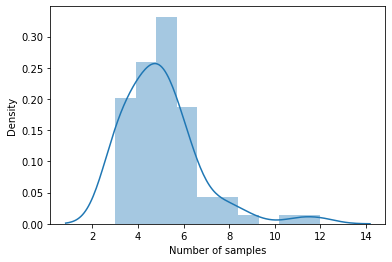

In [ ]:
ax = sns.distplot(number_of_samples_df["Number of samples"])

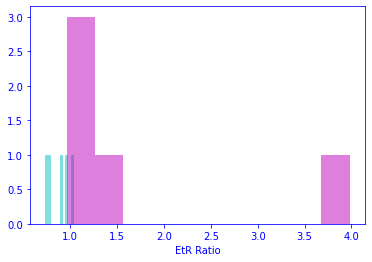

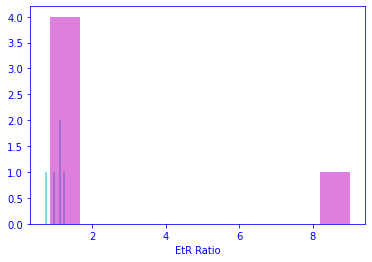

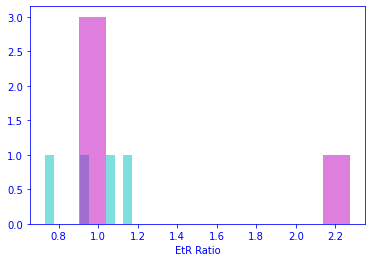

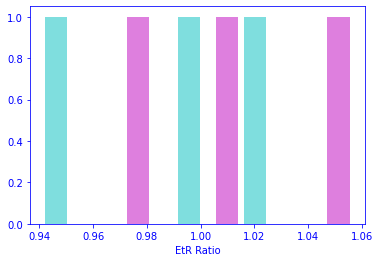

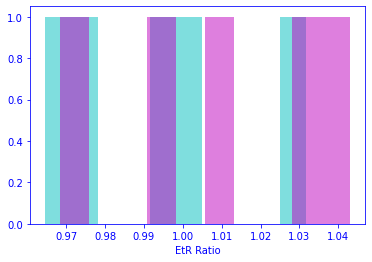

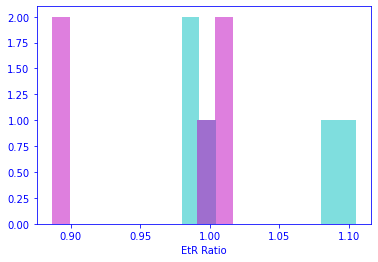

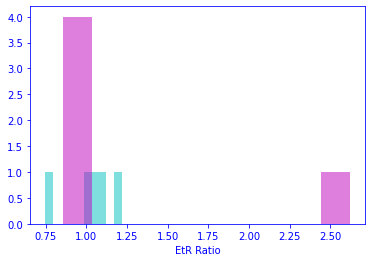

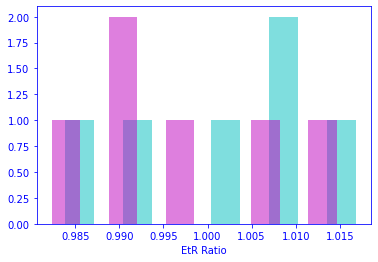

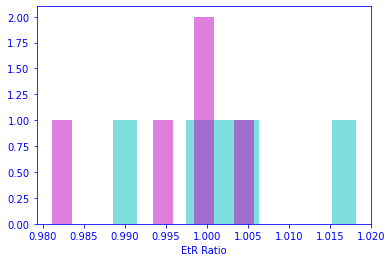

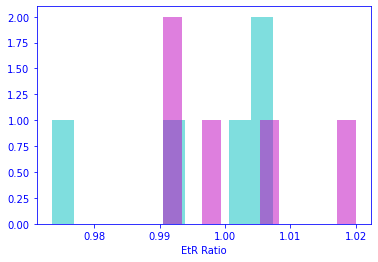

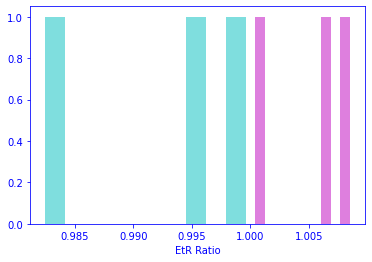

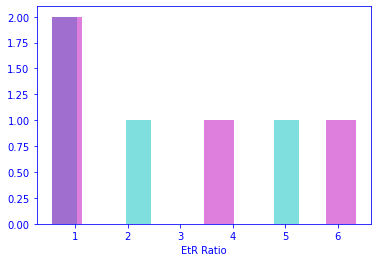

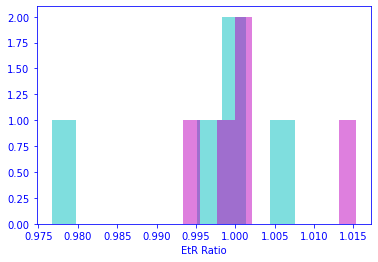

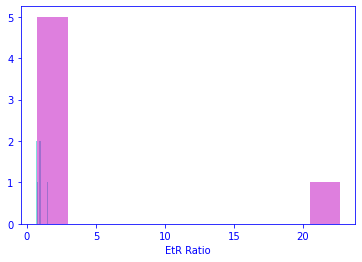

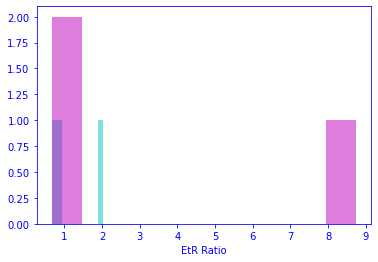

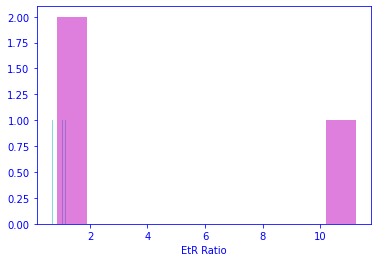

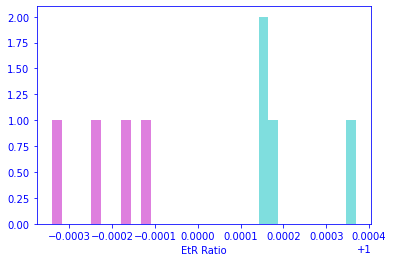

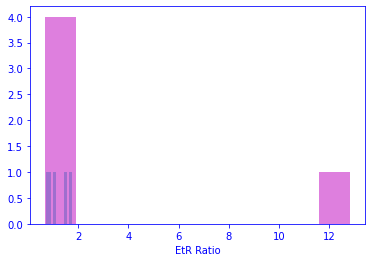

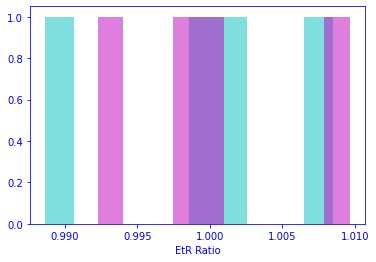

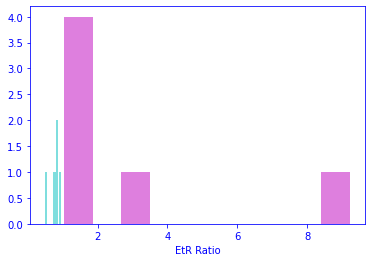

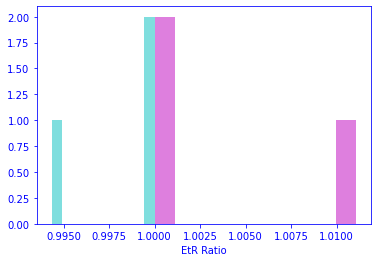

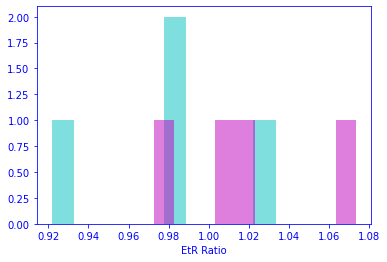

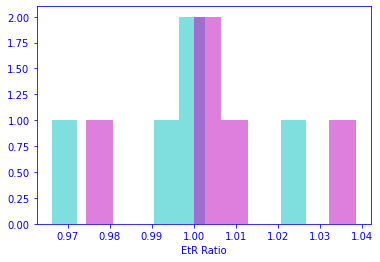

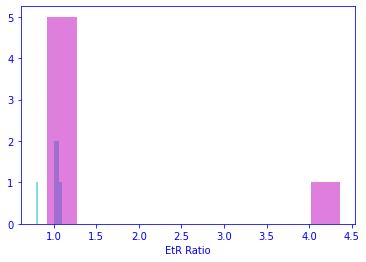

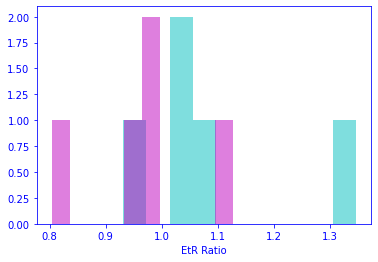

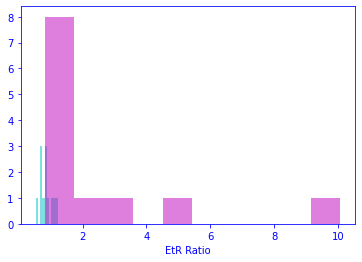

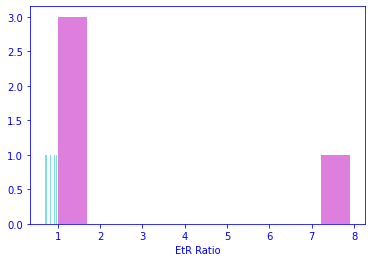

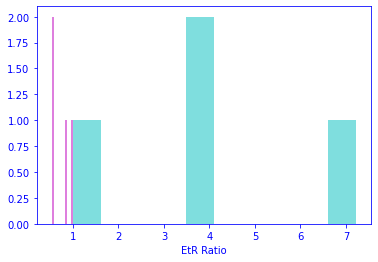

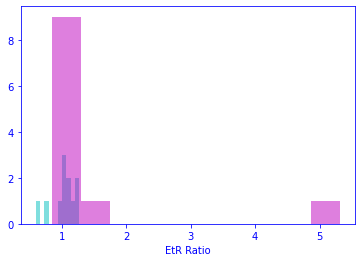

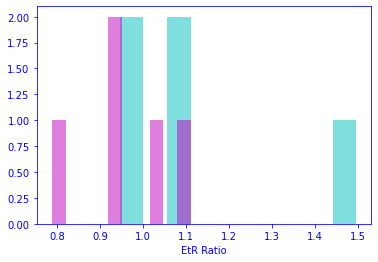

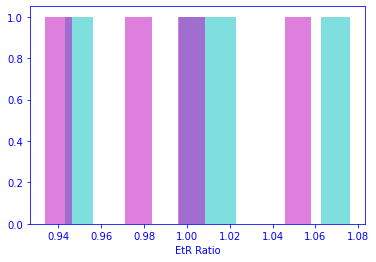

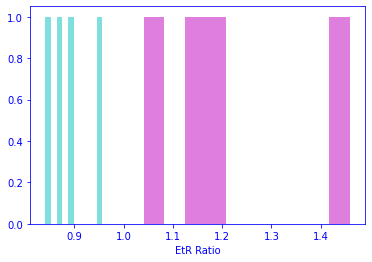

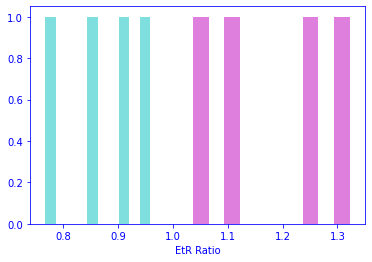

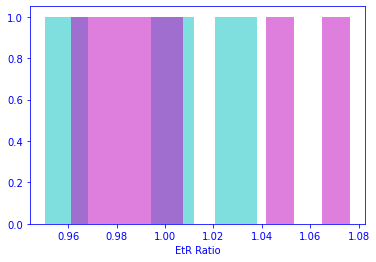

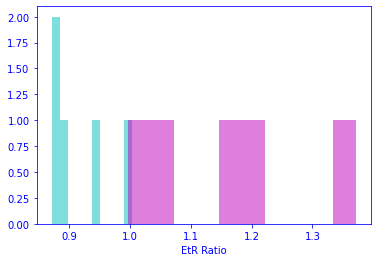

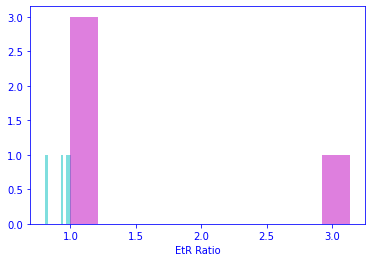

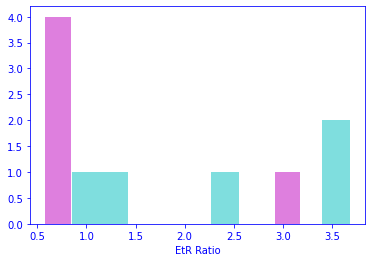

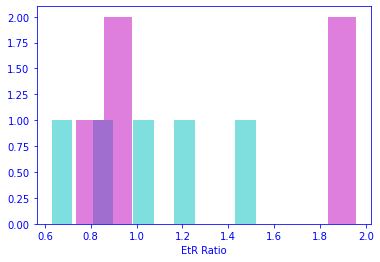

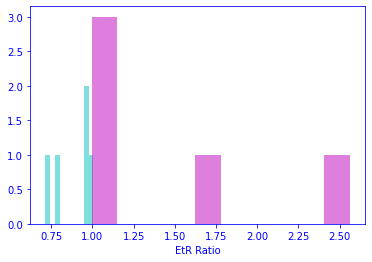

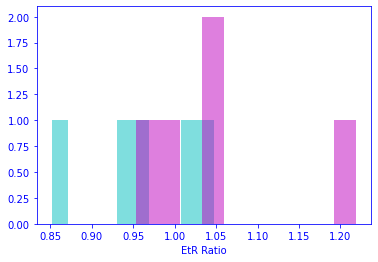

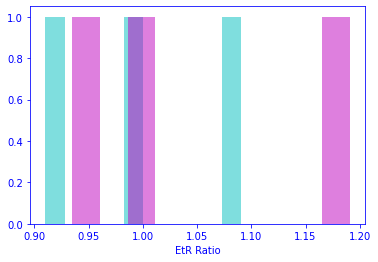

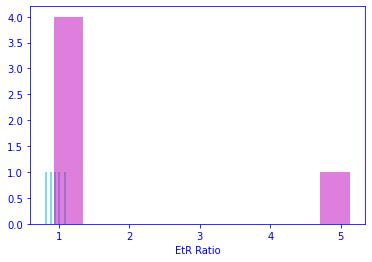

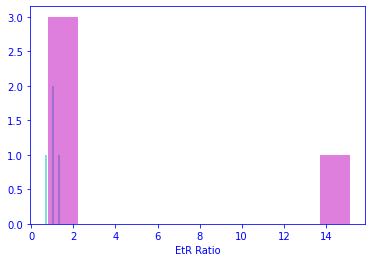

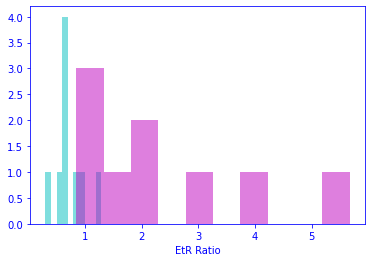

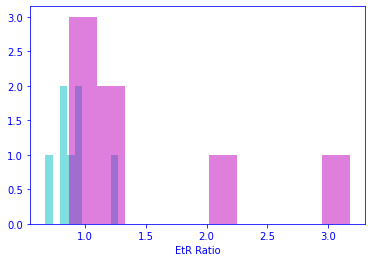

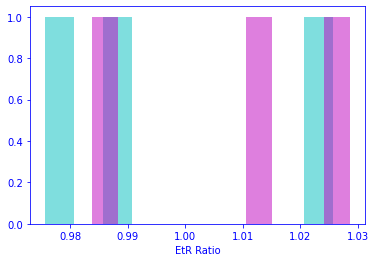

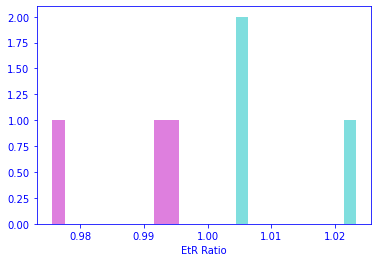

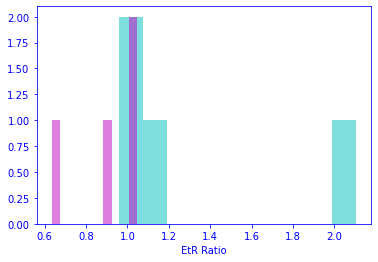

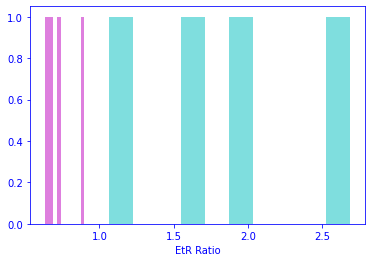

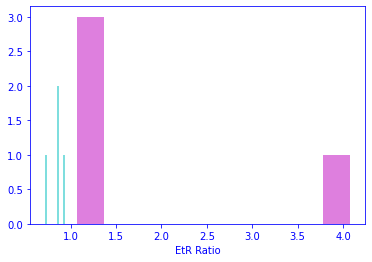

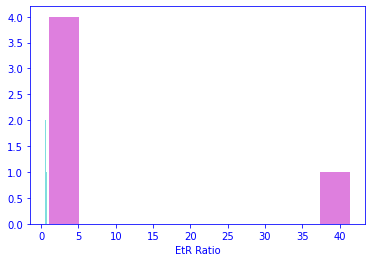

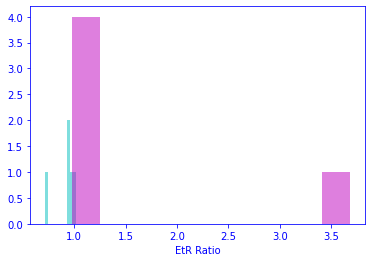

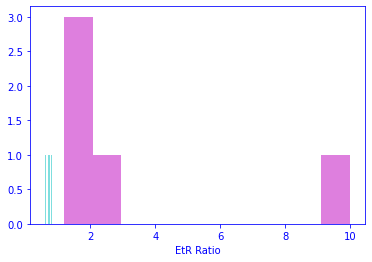

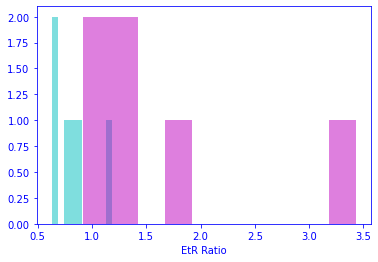

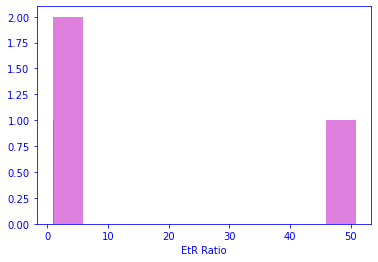

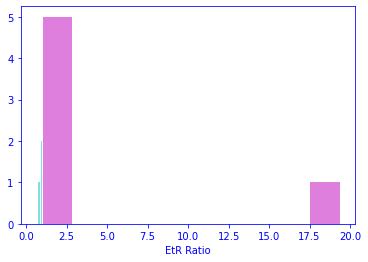

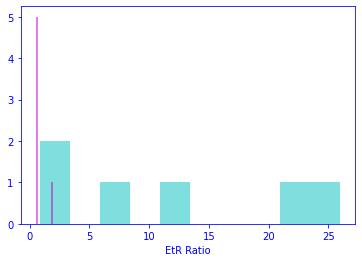

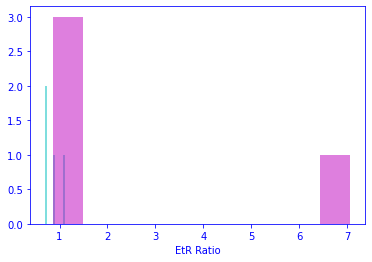

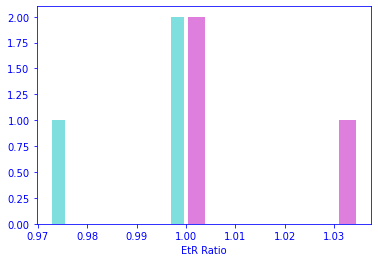

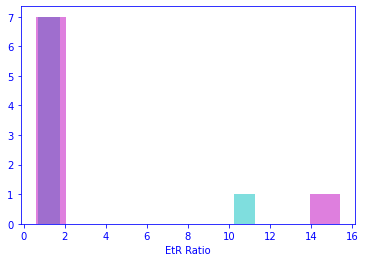

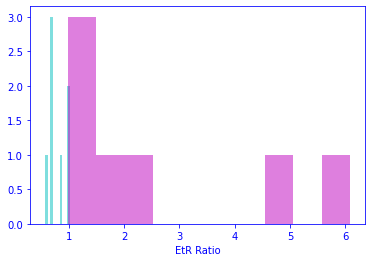

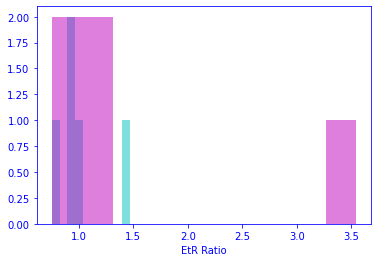

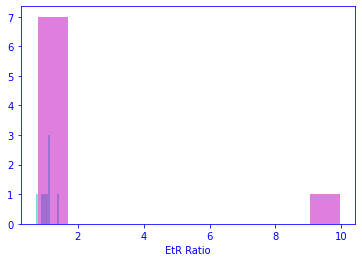

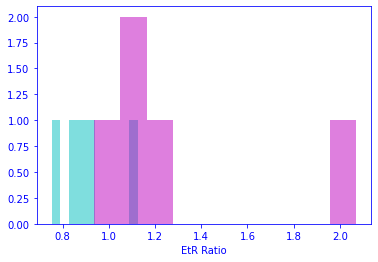

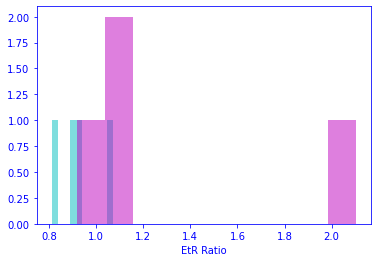

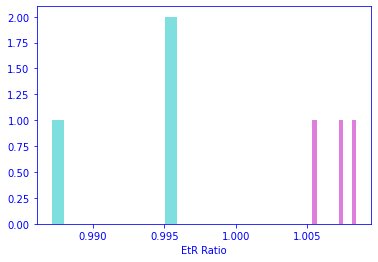

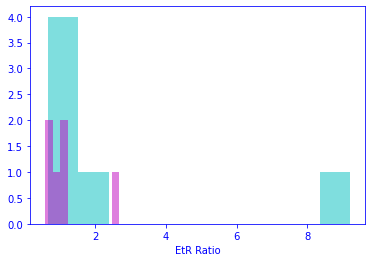

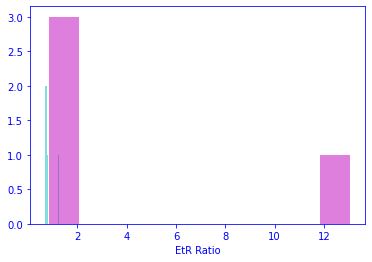

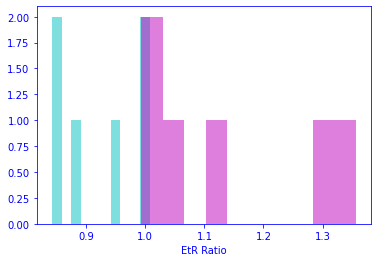

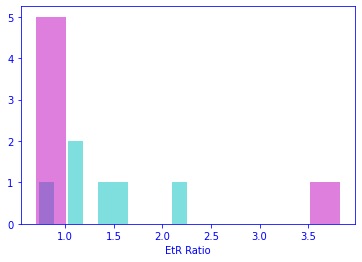

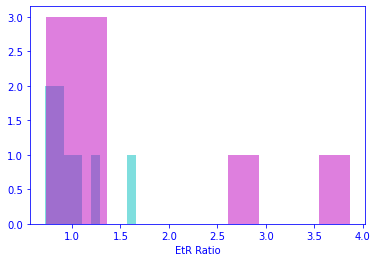

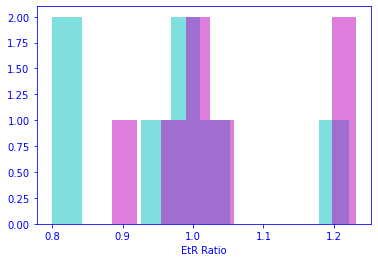

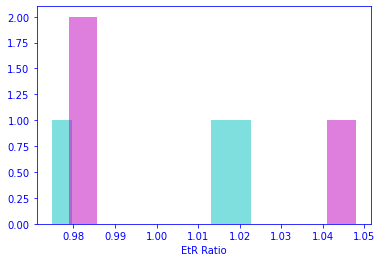

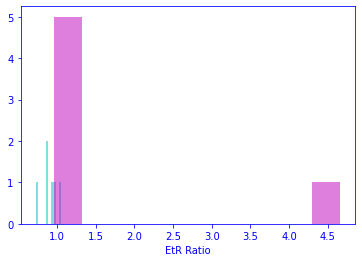

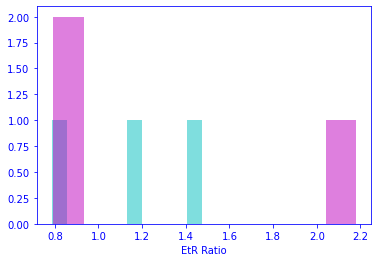

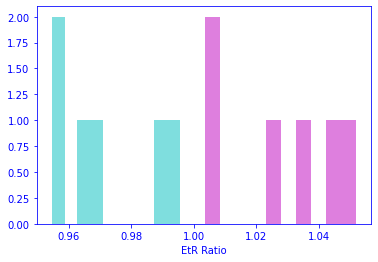

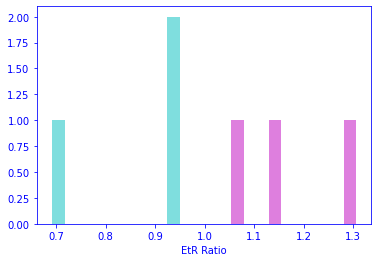

In [ ]:
# histogram distributions of men's and women's etr ratios for each college.

college_womens_etr_ratio_lists_filtered_indices = [i for i, element in enumerate(college_womens_etr_ratio_lists_filtered)]
final_college_names = []
for team in college_womens_etr_ratio_lists_filtered_indices:
  final_college_names.append(college_names_list[team])
params = {'ytick.color': 'b',
          'xtick.color': 'b',
          'axes.labelcolor':'b',
          'axes.edgecolor': 'b'}
plt.rcParams.update(params)
for team in college_womens_etr_ratio_lists_filtered_indices:
  college_mens_etr_ratios = college_mens_etr_ratio_lists_filtered[team]
  mens_etr = plt.hist(college_mens_etr_ratios, color = 'c', alpha = .5)
  college_womens_etr_ratios = college_womens_etr_ratio_lists_filtered[team]
  womens_etr = plt.hist(college_womens_etr_ratios, color = 'm', alpha = .5)
  plt.xlabel("EtR Ratio")
  plt.ylabel("")
  plt.show()
  print('\n')

In [ ]:
college_mens_etr_ratio_lists_filtered

[[0.7362043495080316,
  1.0416265914826466,
  0.9051214501066547,
  0.9651694039617615,
  0.7771594215660454],
 [0.7231701355287843,
  1.1187863738115718,
  0.949705184981806,
  1.2661482001928306,
  1.1513106197682264],
 [0.7338324845016662,
  1.0432171727703987,
  1.1714913530800926,
  0.9467866560018149],
 [1.0244111803639822, 0.9422534067070796, 0.9924629024361885],
 [1.002801953732698,
  0.9766434145889642,
  0.9645905564845778,
  0.994109007017153,
  1.0318051512129283],
 [1.0867140963535202,
  0.9807522413550769,
  1.10545706792461,
  1.0035978962659777,
  0.9797708512947596],
 [0.7490868060526887,
  1.0134309320840453,
  1.218001179228936,
  1.0790857587638776,
  1.0501350057790624],
 [0.9838085269259532,
  1.0088711856356993,
  0.9936847515526067,
  1.016863234428854,
  1.0098406579910348,
  1.0024766839562964],
 [1.0181939024738325,
  1.0009057605116818,
  0.9885310036061864,
  1.0046863796706187,
  1.00012363995297],
 [1.0052978314089762,
  0.9917059725140028,
  1.0030461060

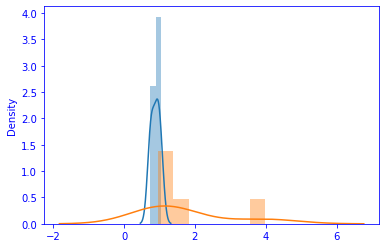

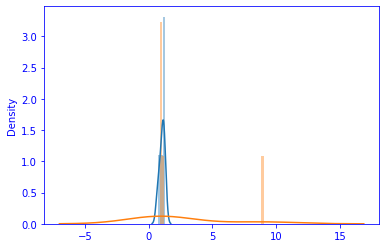

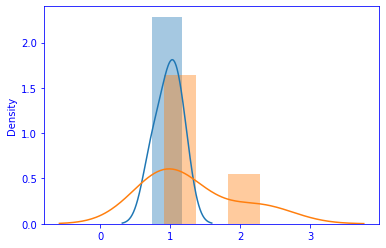

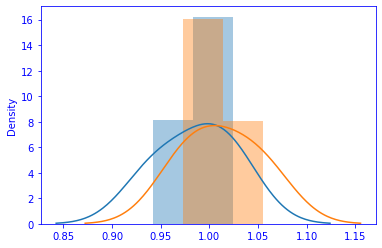

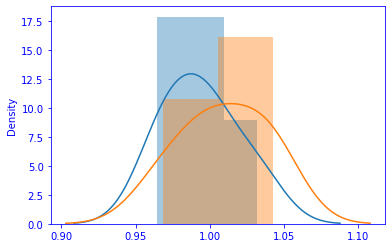

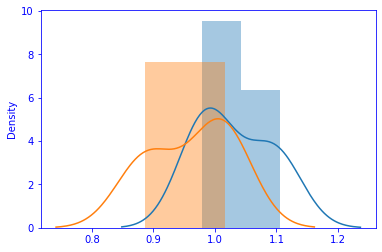

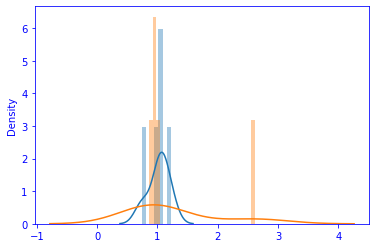

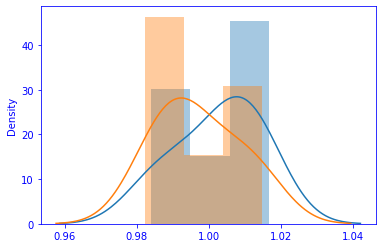

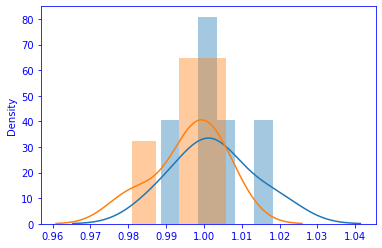

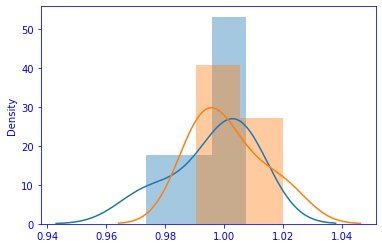

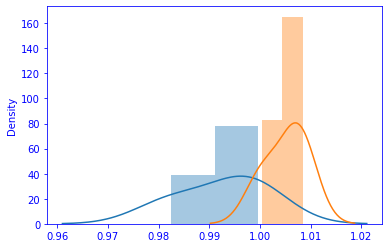

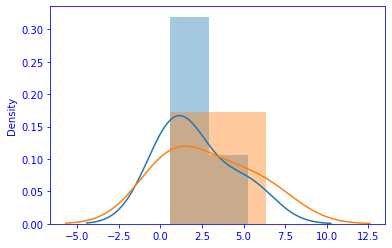

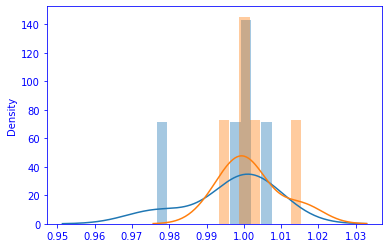

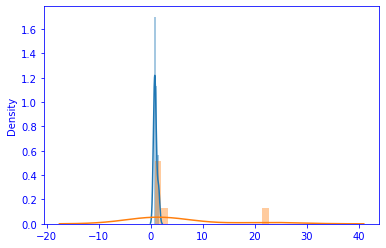

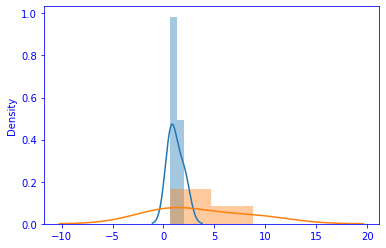

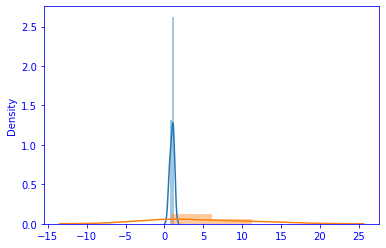

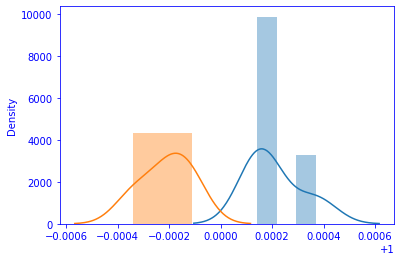

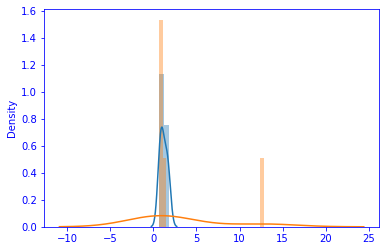

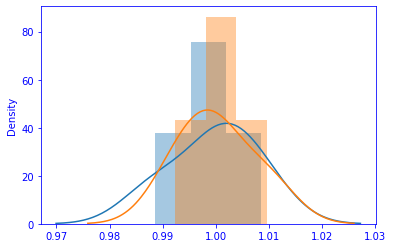

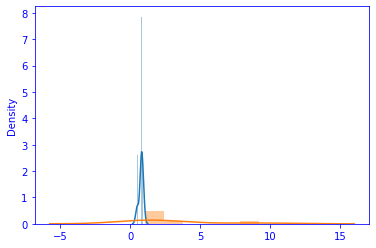

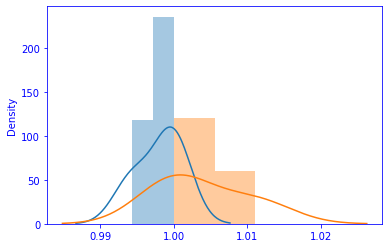

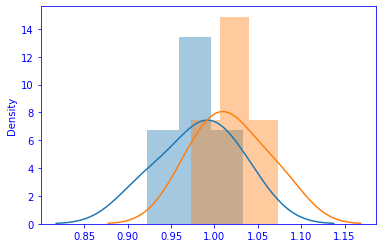

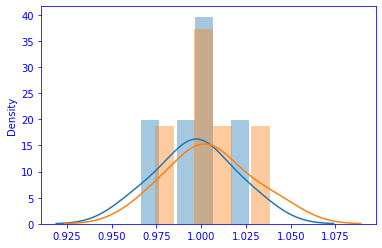

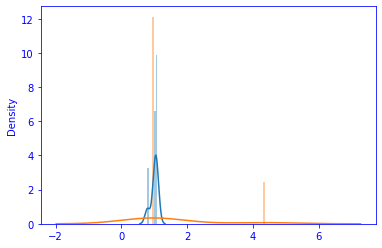

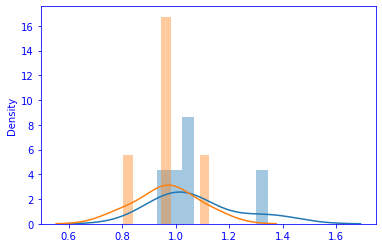

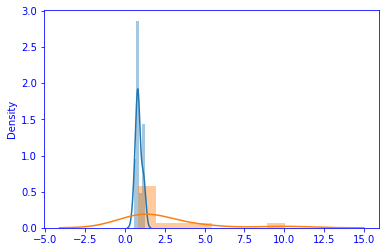

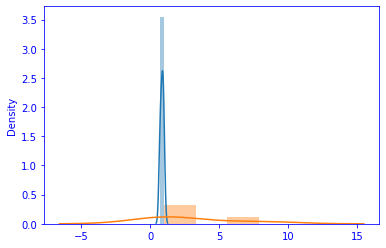

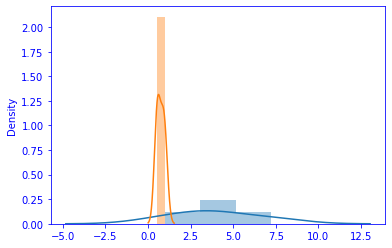

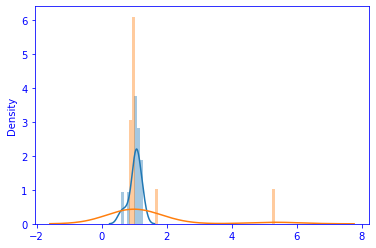

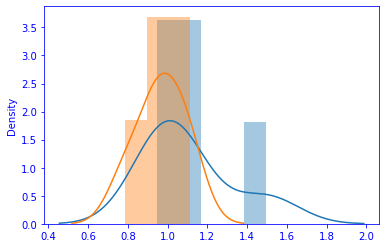

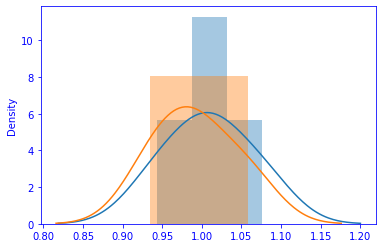

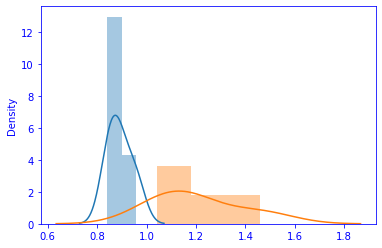

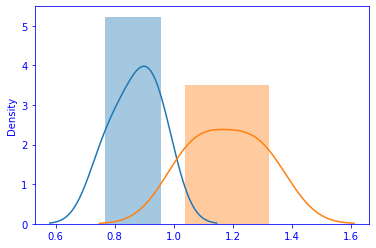

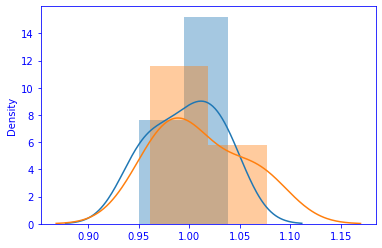

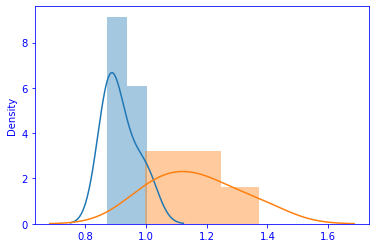

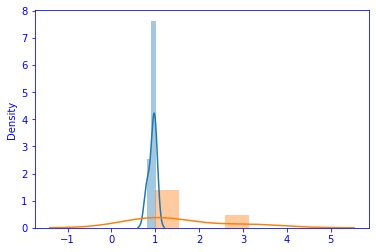

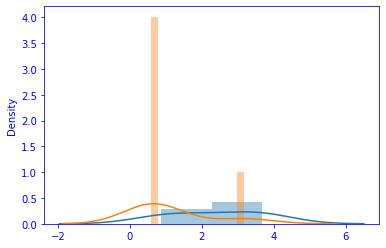

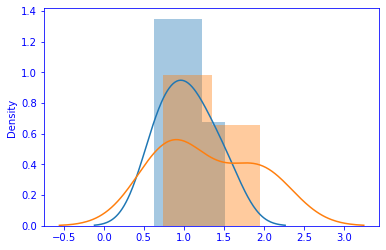

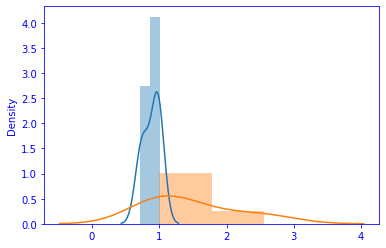

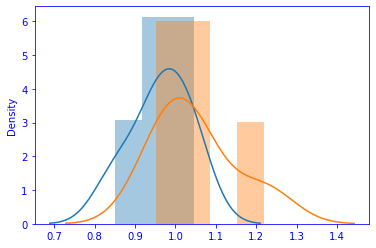

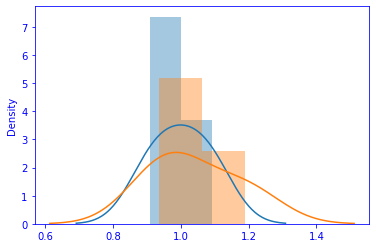

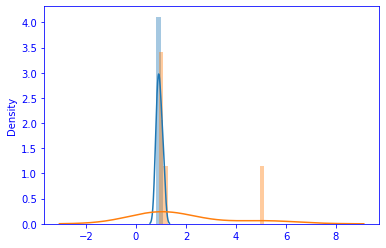

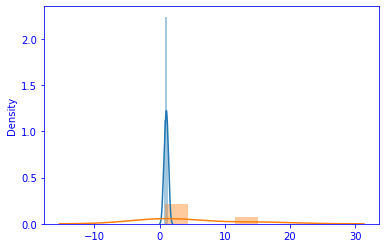

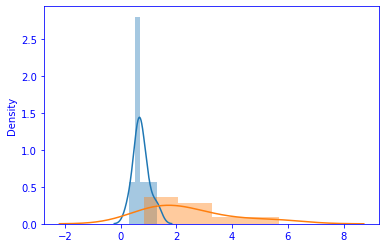

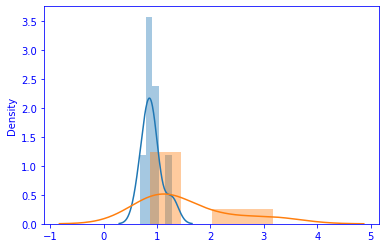

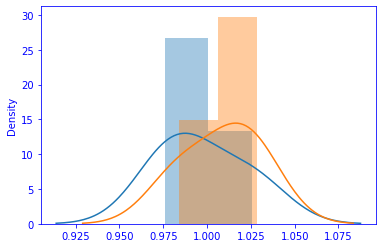

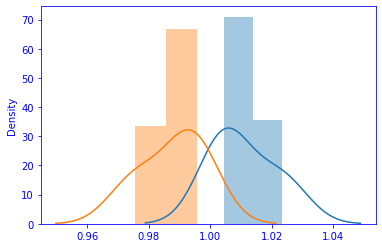

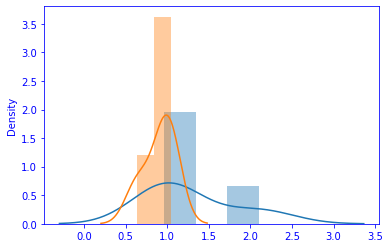

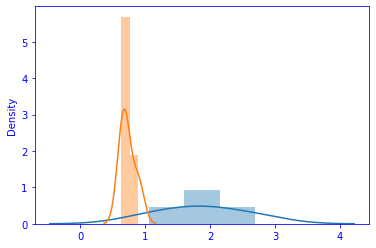

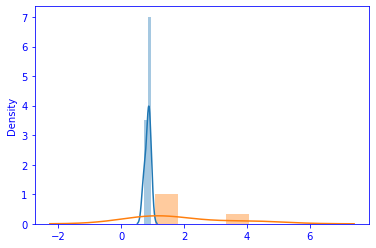

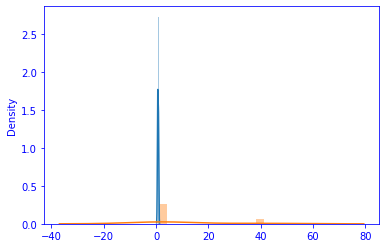

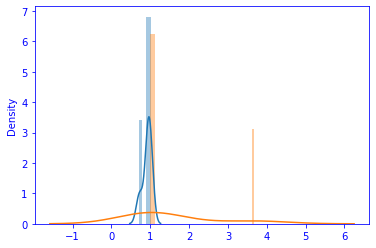

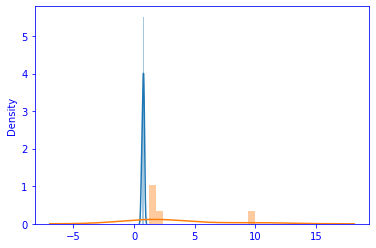

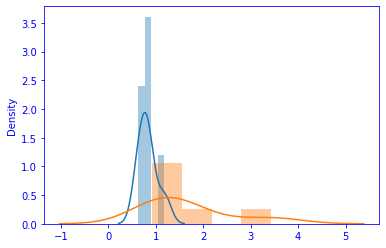

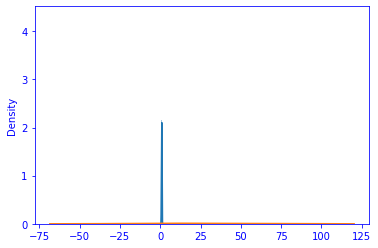

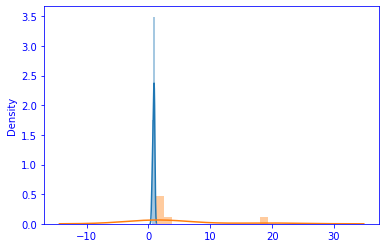

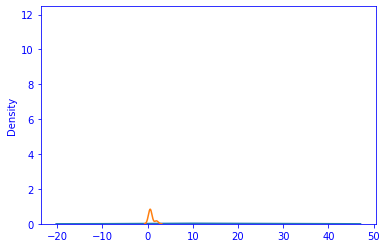

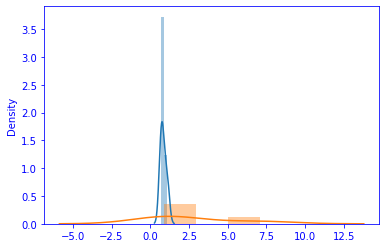

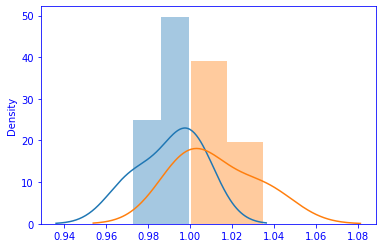

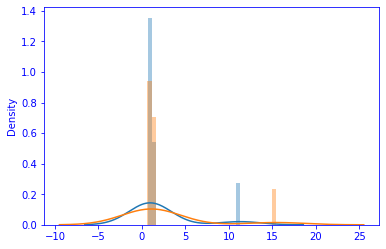

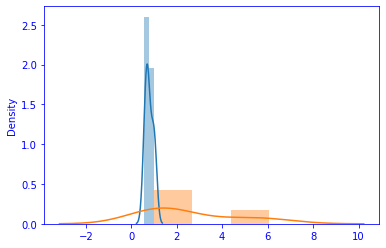

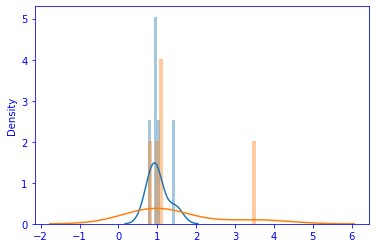

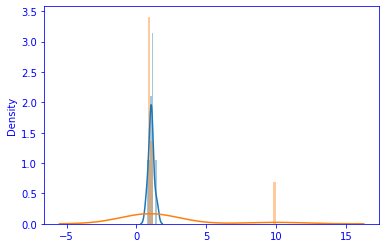

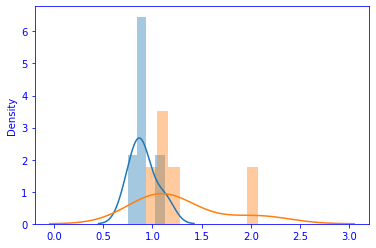

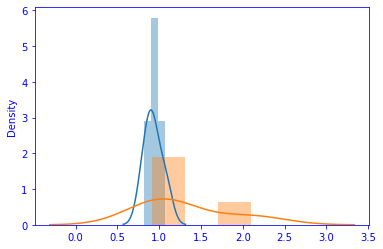

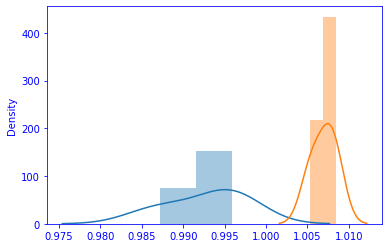

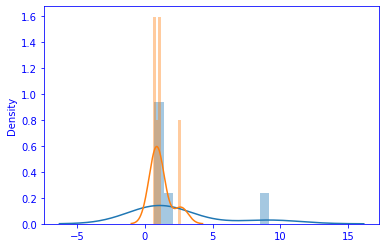

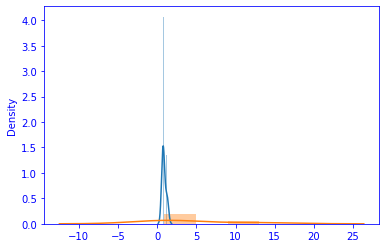

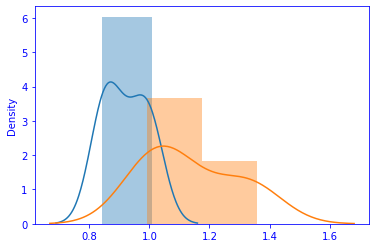

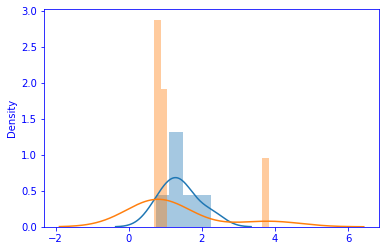

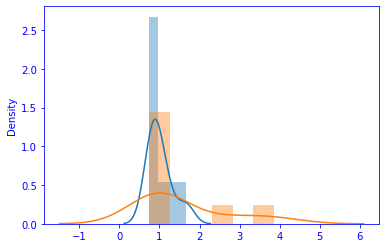

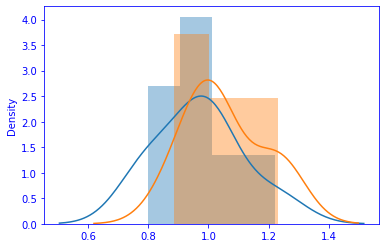

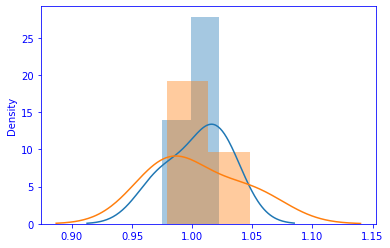

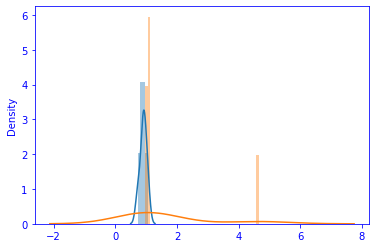

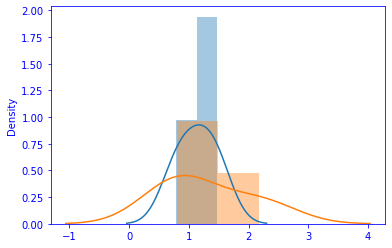

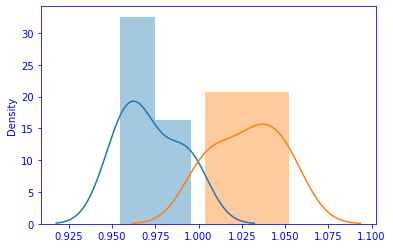

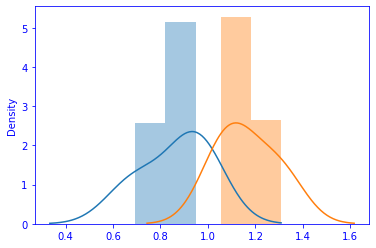

In [ ]:
# It'll look better with seaborn.

for team in college_womens_etr_ratio_lists_filtered_indices:
  mens_etr = college_mens_etr_ratio_lists_filtered[team]
  womens_etr = college_womens_etr_ratio_lists_filtered[team]
  fig, ax = plt.subplots()
  for a in [mens_etr, womens_etr]:
    sns.distplot(a, ax = ax, kde = True)

In [ ]:
# checking out the descriptive stats for each gender at each school...
# reviewed the skewness and kurtosis. There's definitely some
# non-normally distributed data. I'll have to break these lists into two
# for purposes of testing.
# Note that the college names are not accurate at this point.

for team in college_womens_etr_ratio_lists_filtered_indices:
  college_mens_etr_ratios = college_mens_etr_ratio_lists_filtered[team]
  college_womens_etr_ratios = college_womens_etr_ratio_lists_filtered[team]
  print(college_names_list[team])
  print(stats.describe(college_mens_etr_ratios))
  print(stats.describe(college_womens_etr_ratios))
  print('\n')

Appalachian State University
DescribeResult(nobs=5, minmax=(0.7362043495080316, 1.0416265914826466), mean=0.8850562433250279, variance=0.016283403847797605, skewness=-0.026060903664827793, kurtosis=-1.5046613335277017)
DescribeResult(nobs=5, minmax=(0.9615360340328699, 3.981801399788166), mean=1.7091615575101315, variance=1.643763985943235, skewness=1.4344096125093766, kurtosis=0.15731750239452813)


Arizona State University-Tempe
DescribeResult(nobs=5, minmax=(0.7231701355287843, 1.2661482001928306), mean=1.0418241028566437, variance=0.044564508776470176, skewness=-0.5966290406640451, kurtosis=-0.9397192673715806)
DescribeResult(nobs=5, minmax=(0.8522684341080633, 9.009867879745054), mean=2.545937993663002, variance=13.062864817082218, skewness=1.4983247557709587, kurtosis=0.24773669146816868)


Auburn University
DescribeResult(nobs=4, minmax=(0.7338324845016662, 1.1714913530800926), mean=0.9738319165884931, variance=0.034071580043935366, skewness=-0.3541855422950524, kurtosis=-1.1363

In [ ]:
# test for normality and assign different lists for those that are normal and those that aren't

normal_dist_mens_etr_ratios = []
not_normal_dist_mens_etr_ratios = []
normal_dist_womens_etr_ratios = []
not_normal_dist_womens_etr_ratios = []
for team in college_womens_etr_ratio_lists_filtered_indices:
  college_mens_etr_ratios = college_mens_etr_ratio_lists_filtered[team]
  college_womens_etr_ratios = college_womens_etr_ratio_lists_filtered[team]
  if stats.shapiro(college_mens_etr_ratios)[0] >= 0:
    if stats.shapiro(college_mens_etr_ratios)[1] > 0.05:
      if stats.shapiro(college_womens_etr_ratios)[0] >= 0.0:
        if stats.shapiro(college_womens_etr_ratios)[1] > 0.05:
          normal_dist_mens_etr_ratios.append(college_mens_etr_ratios)
          normal_dist_womens_etr_ratios.append(college_womens_etr_ratios)
        else:
          not_normal_dist_mens_etr_ratios.append(college_mens_etr_ratios)
          not_normal_dist_womens_etr_ratios.append(college_womens_etr_ratios)
      else:
        not_normal_dist_mens_etr_ratios.append(college_mens_etr_ratios)
        not_normal_dist_womens_etr_ratios.append(college_womens_etr_ratios)
    else:
      not_normal_dist_mens_etr_ratios.append(college_mens_etr_ratios)
      not_normal_dist_womens_etr_ratios.append(college_womens_etr_ratios)
  else:
    not_normal_dist_mens_etr_ratios.append(college_mens_etr_ratios)
    not_normal_dist_womens_etr_ratios.append(college_womens_etr_ratios)

In [ ]:
# Checking the number of normally distributed data and non-normally distributed
# data for both genders.

print(len(normal_dist_mens_etr_ratios))
print(len(not_normal_dist_mens_etr_ratios))
print(len(normal_dist_womens_etr_ratios))
print(len(not_normal_dist_womens_etr_ratios))

36
41
36
41


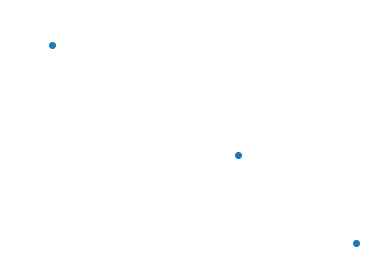

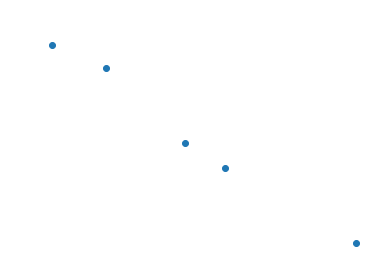

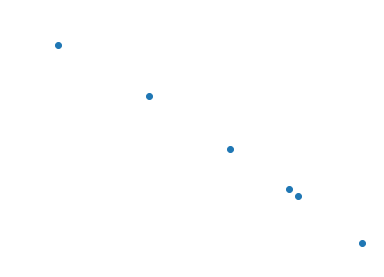

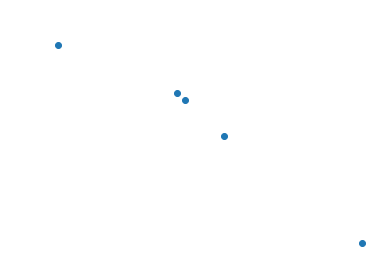

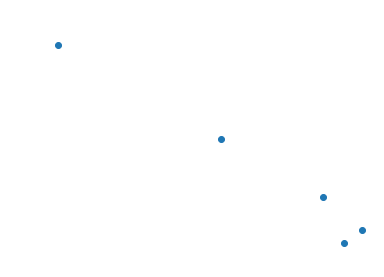

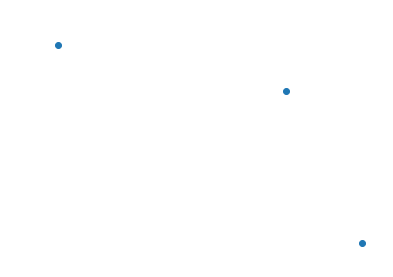

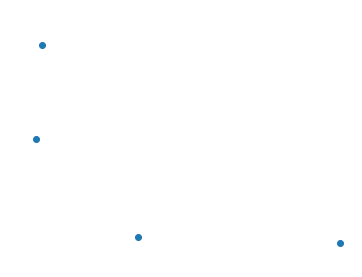

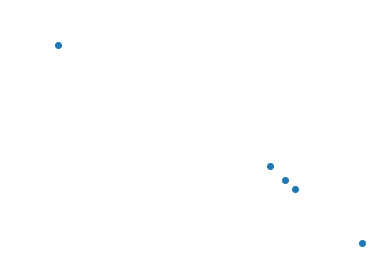

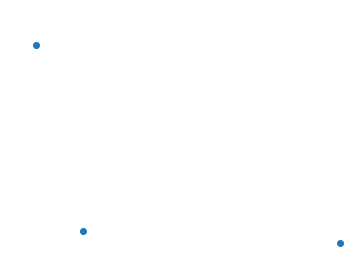

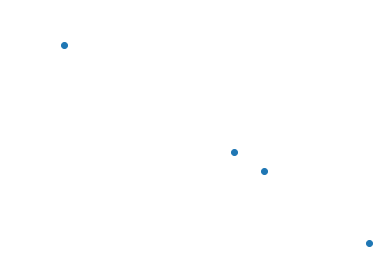

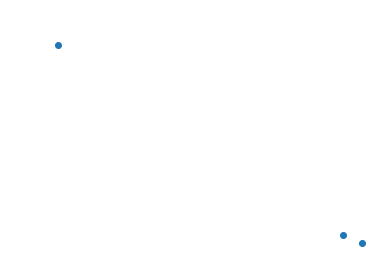

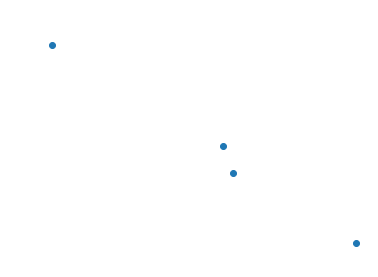

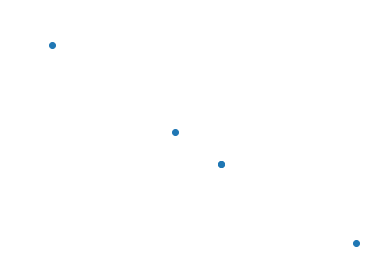

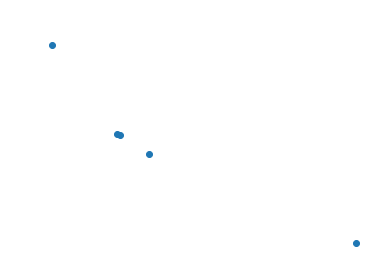

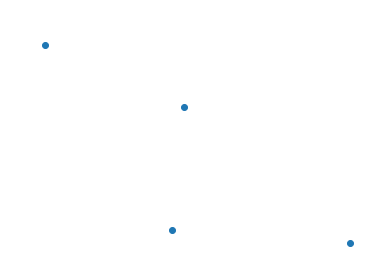

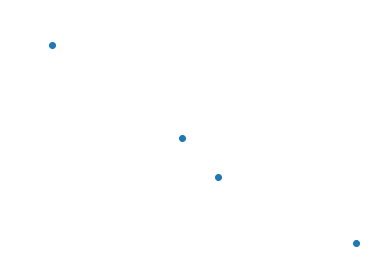

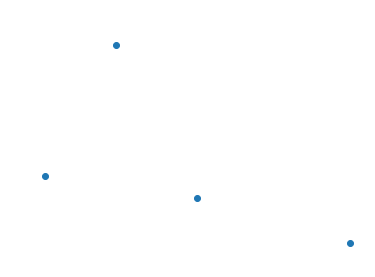

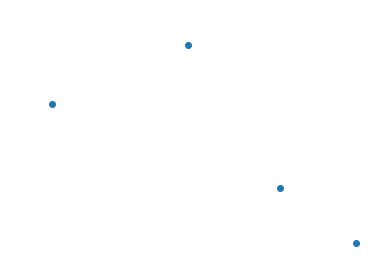

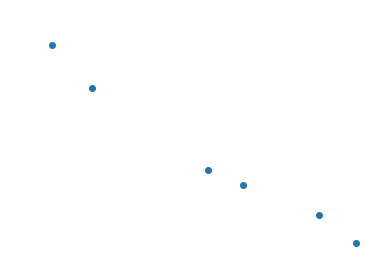

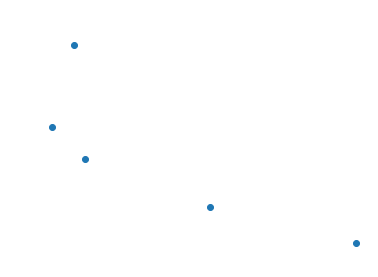

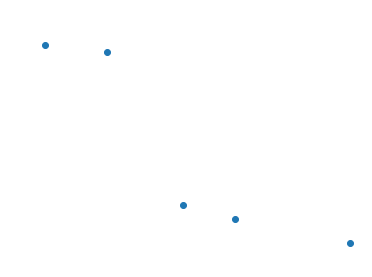

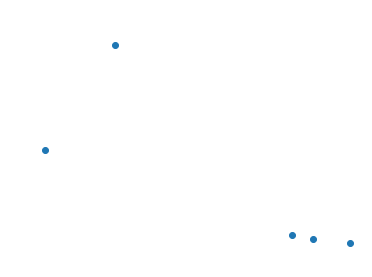

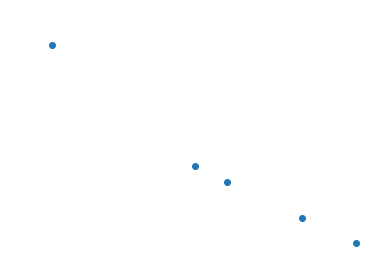

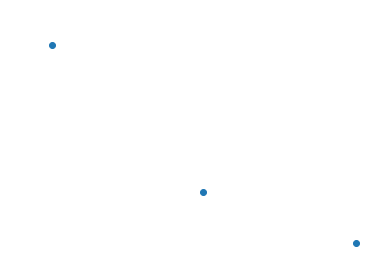

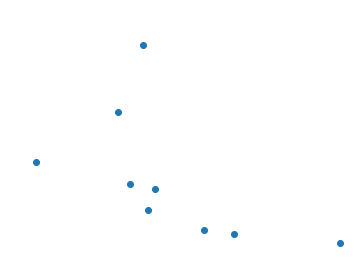

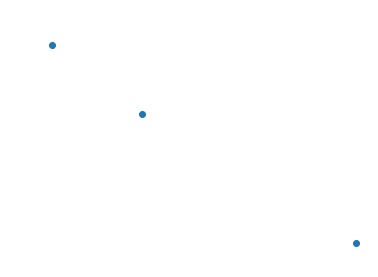

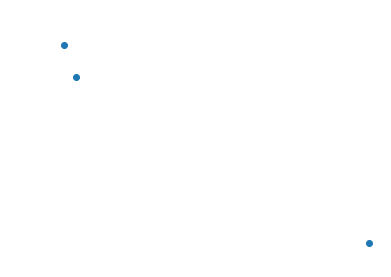

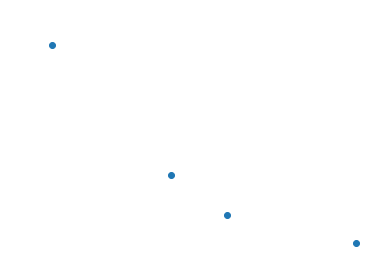

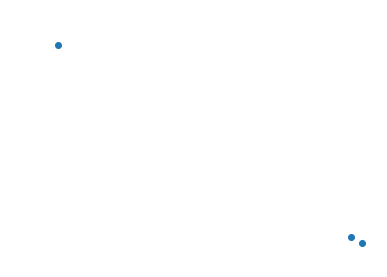

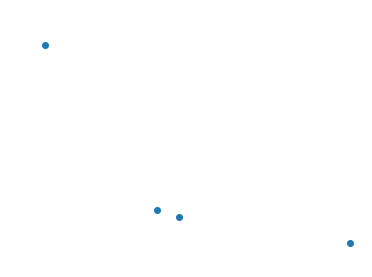

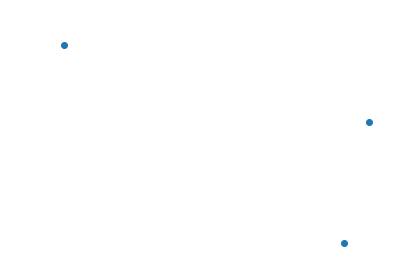

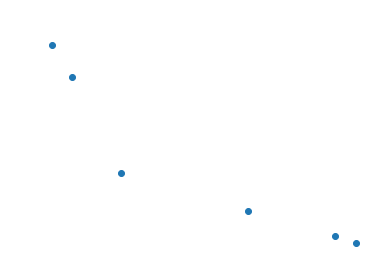

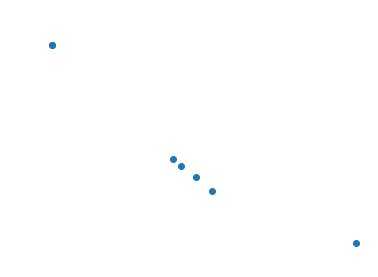

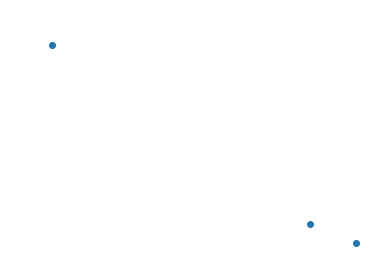

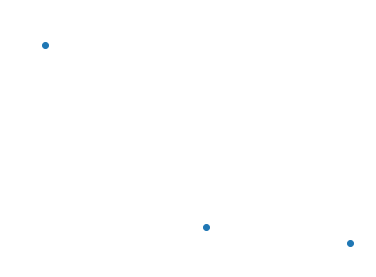

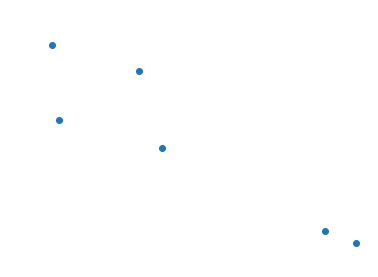

In [ ]:
## Let's check out the scatterplots for the normally distributed etr ratios.

normal_dist_indices = [i for i, element in enumerate(normal_dist_mens_etr_ratios)]
normal_dist_college_names = []
for team in normal_dist_indices:
  normal_dist_college_names.append(college_names_list[team]) ## college_names_list needs to be a new list
  # of colleges that are normally distributed...
  # can still get a count of colleges for which the etr ratios aren't equitable without names though
  # so this will be ignored for the purposes of this experiment
params = {'ytick.color': 'w',
          'xtick.color': 'w',
          'axes.labelcolor':'w',
          'axes.edgecolor': 'w'}
plt.rcParams.update(params)
for team in normal_dist_indices:
  normal_dist_mens = normal_dist_mens_etr_ratios[team]
  normal_dist_womens = normal_dist_womens_etr_ratios[team]
  plt.scatter(x = normal_dist_mens, y = normal_dist_womens)
  plt.suptitle('{}'.format(final_college_names[team]), color = 'w')
  plt.show()
  print('\n')

# make some scatterplots just to confirm normality

Number of colleges with normally dist. data: 36
Degrees of freedom: 3
Ttest_indResult(statistic=2.465234052758078, pvalue=0.048771923201330114)
We reject the null hypothesis.
Degrees of freedom: 3
Ttest_indResult(statistic=-3.372225480835461, pvalue=0.015001138934911434)
We reject the null hypothesis.
Degrees of freedom: 3
Ttest_indResult(statistic=-4.048677799156987, pvalue=0.006736199560930355)
We reject the null hypothesis.
Degrees of freedom: 4
Ttest_indResult(statistic=-3.5470147307211666, pvalue=0.007542223453057791)
We reject the null hypothesis.
Degrees of freedom: 8
Ttest_indResult(statistic=-3.1509369464097974, pvalue=0.0061830320294546616)
We reject the null hypothesis.
Degrees of freedom: 3
Ttest_indResult(statistic=3.307739159436792, pvalue=0.01625042351650278)
We reject the null hypothesis.
Degrees of freedom: 2
Ttest_indResult(statistic=-4.823384306351329, pvalue=0.008502065068161115)
We reject the null hypothesis.
Degrees of freedom: 5
Ttest_indResult(statistic=-3.10959

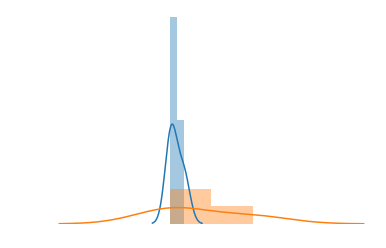

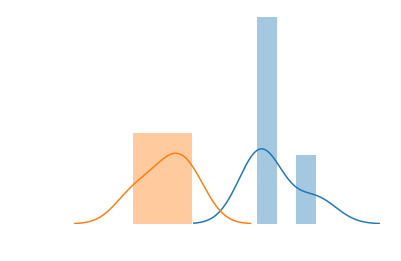

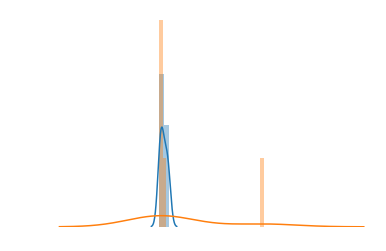

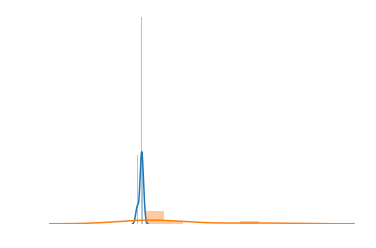

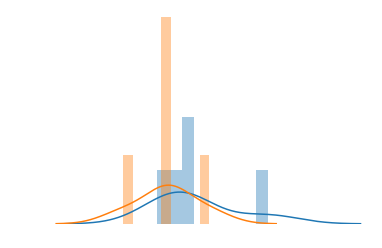

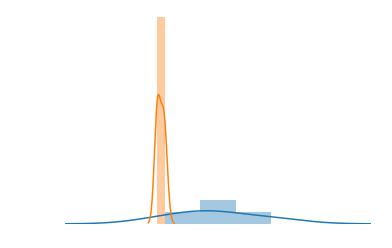

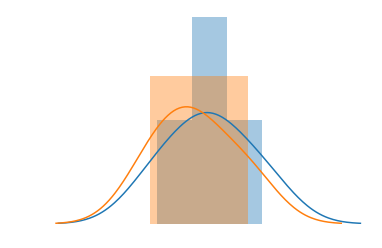

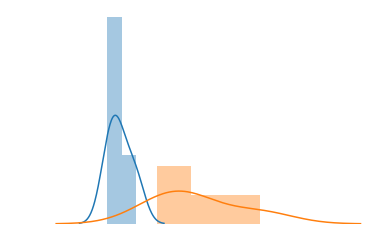

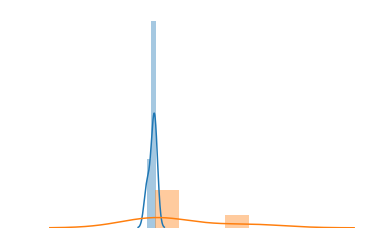

In [ ]:
# run t-tests for all colleges with normally distributed men's teams' etr ratio
# and normally distributed women's teams' etr.

print("Number of colleges with normally dist. data: {}".format(len(normal_dist_indices))) # 36 colleges with normally dist. data
degrees_of_freedom = []
null_rejected = 0
for team in normal_dist_indices:
  # let's figure out our degrees of freedom for each one.
  # then, we'll print it next to each ttest so we can easily check the validity
  # and t-statistic of each one.
  etr_ratios_quantity = len(normal_dist_mens_etr_ratios[team])
  df = etr_ratios_quantity - 1
  degrees_of_freedom.append(df)
  ttest, pval = stats.ttest_ind(normal_dist_mens_etr_ratios[team], normal_dist_womens_etr_ratios[team])
  if pval < 0.05:
    print("Degrees of freedom: {}".format(df))
    print(stats.ttest_ind(normal_dist_mens_etr_ratios[team], normal_dist_womens_etr_ratios[team]))
    print("We reject the null hypothesis.")
    mens_etr = college_mens_etr_ratio_lists_filtered[team]
    womens_etr = college_womens_etr_ratio_lists_filtered[team]
    fig, ax = plt.subplots()
    for a in [mens_etr, womens_etr]:
      sns.distplot(a, ax = ax, kde = True)
    null_rejected += 1

print("The number of colleges with normally distributed EtR ratios")
print("and have a significant difference between the mens and womens EtR ratios is: {}".format(null_rejected))

In [ ]:
def get_95_ci(array_1, array_2):
    array_1_df = pd.DataFrame(array_1)
    array_2_df = pd.DataFrame(array_2)
    sample_1_n = array_1_df.shape[0]
    sample_2_n = array_2_df.shape[0]
    sample_1_mean = array_1_df.mean()
    sample_2_mean = array_2_df.mean()
    sample_1_var = array_1_df.var()
    sample_2_var = array_2_df.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    print(stats.ttest_ind(college_mens_etr_ratio_lists_filtered[36], college_womens_etr_ratio_lists_filtered[36]))
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(college_mens_etr_ratio_lists_filtered[37], college_womens_etr_ratio_lists_filtered[37]))

Ttest_indResult(statistic=1.6255140448134142, pvalue=0.14270646912704102)
The difference in means at the 95% confidence interval (two-tail) is between 0   -0.343704
dtype: float64 and 0    0.858693
dtype: float64.


In [ ]:
expenses_2018[expenses_2018['Institution Name'] == 'San Diego State University'].to_csv('/drive/MyDrive/Capstone.1/espensessdu.csv')

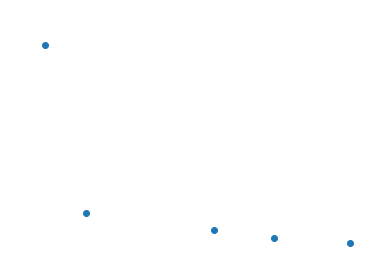

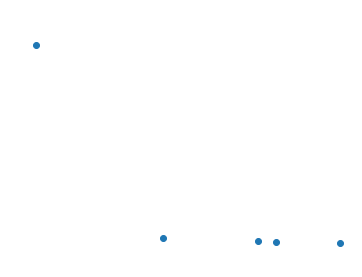

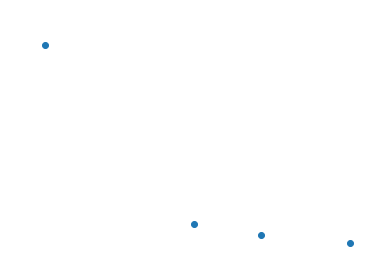

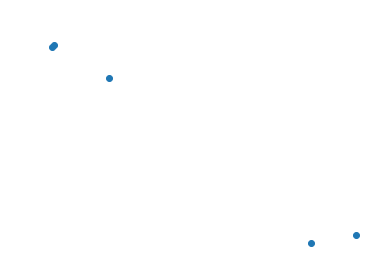

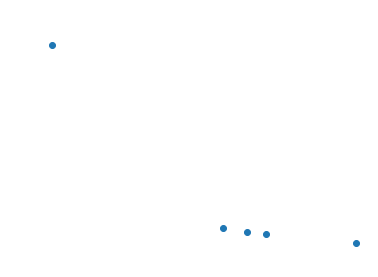

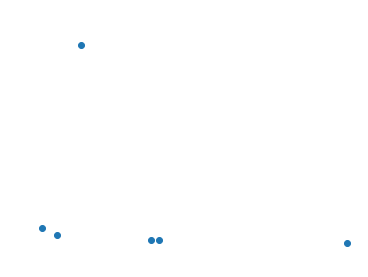

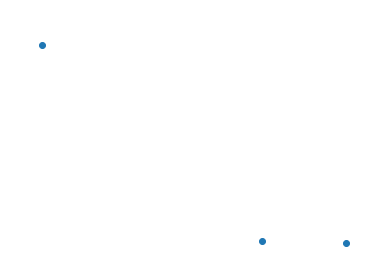

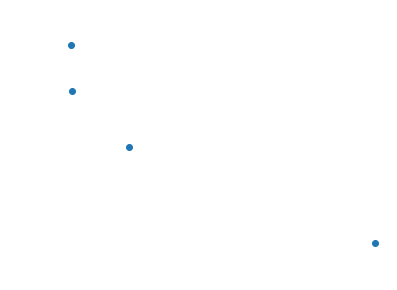

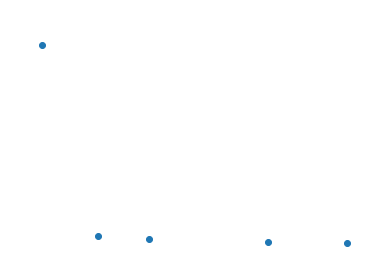

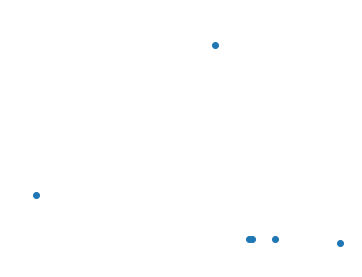

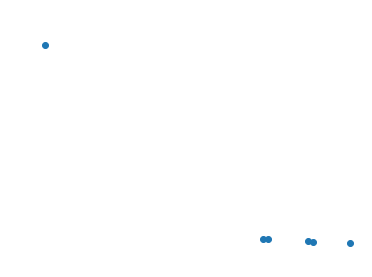

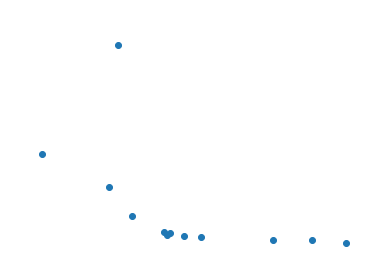

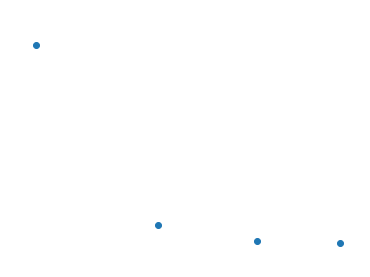

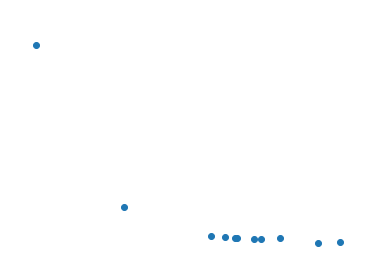

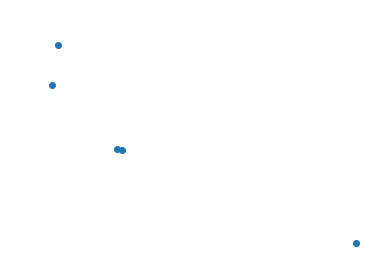

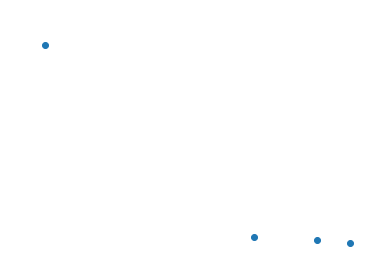

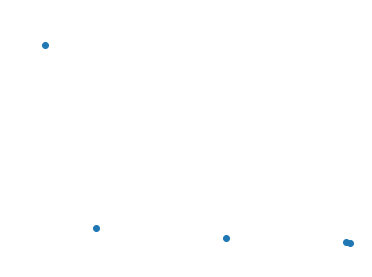

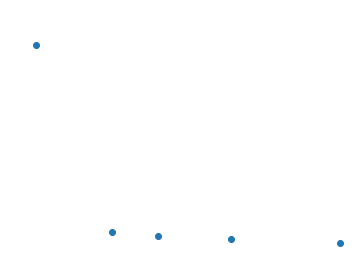

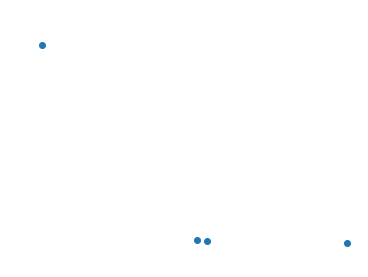

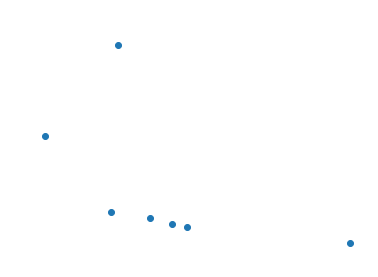

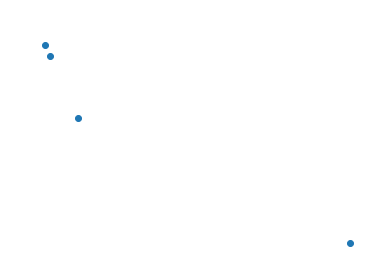

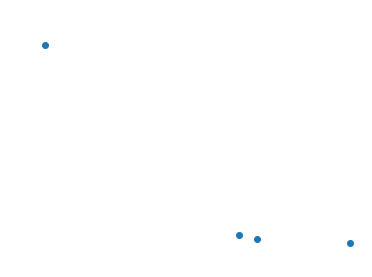

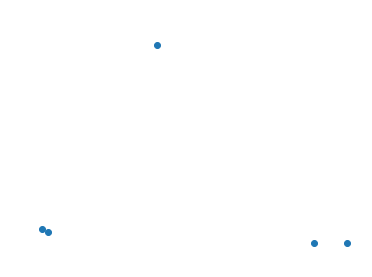

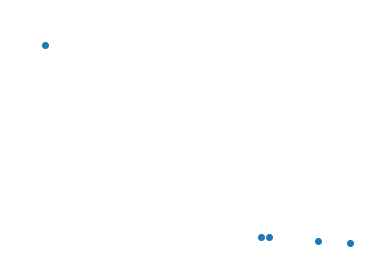

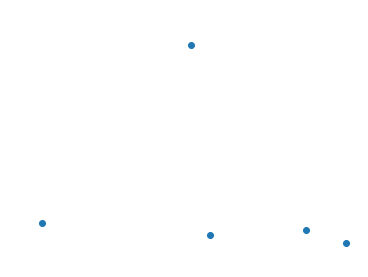

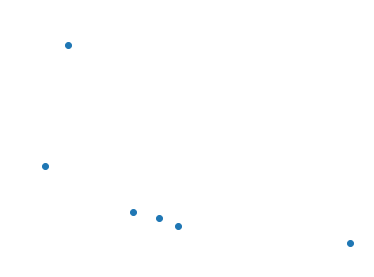

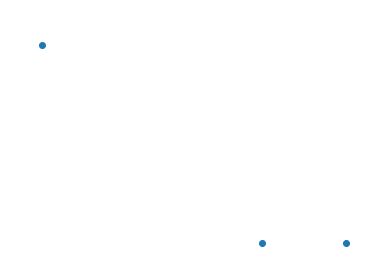

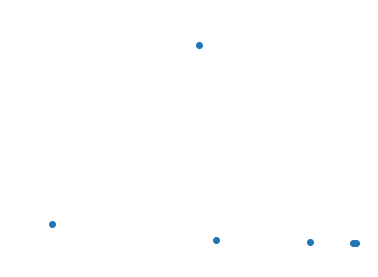

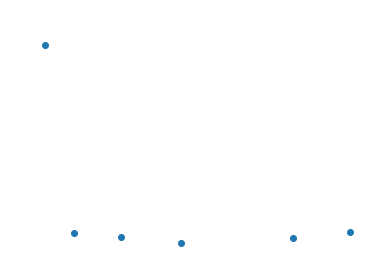

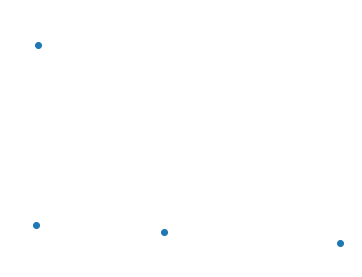

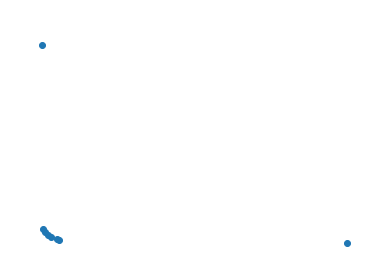

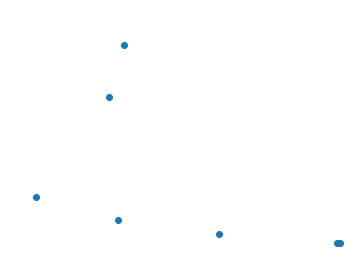

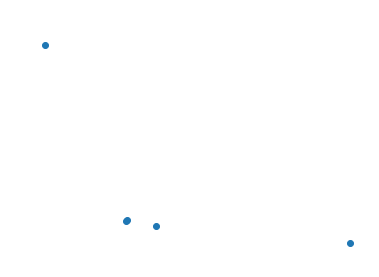

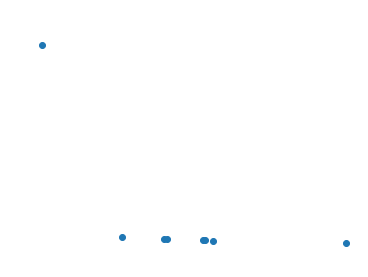

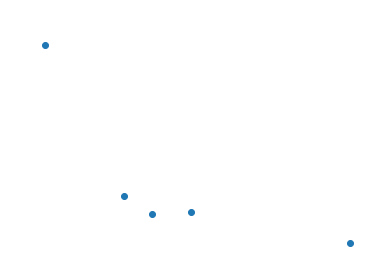

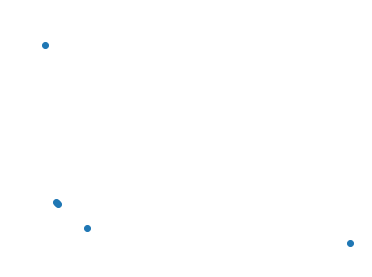

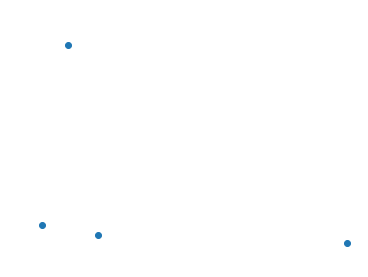

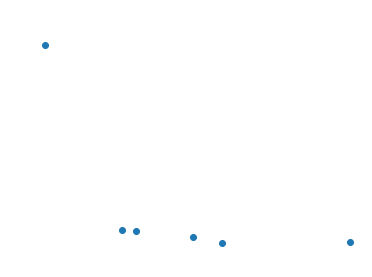

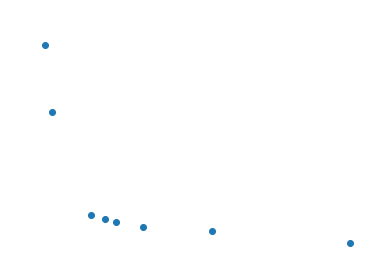

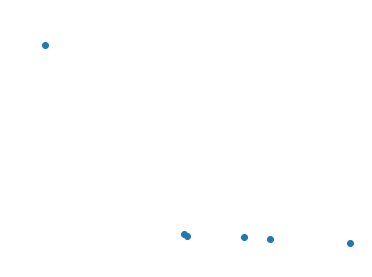

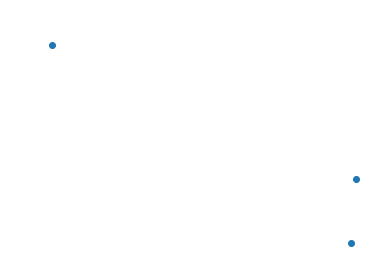

In [ ]:
# run Kruskall-Wallis tests for all colleges with non-normally distributed men's teams' etr ratio
# and nonnormally distributed women's teams' etr

not_normal_dist_indices = [i for i, element in enumerate(not_normal_dist_mens_etr_ratios)]
not_normal_dist_college_names = []
for team in not_normal_dist_indices:
  not_normal_dist_college_names.append(college_names_list[team]) ## college_names_list needs to be a new list
  # of colleges that are non-normally distributed...ignored for now since the names aren't really required here.
params = {'ytick.color': 'w',
          'xtick.color': 'w',
          'axes.labelcolor':'w',
          'axes.edgecolor': 'w'}
plt.rcParams.update(params)
for team in not_normal_dist_indices:
  not_normal_dist_mens = not_normal_dist_mens_etr_ratios[team]
  not_normal_dist_womens = not_normal_dist_womens_etr_ratios[team]
  plt.scatter(x = not_normal_dist_mens, y = not_normal_dist_womens)
  plt.suptitle('{}'.format(final_college_names[team]), color = 'w')
  plt.show()

# make some scatterplots just to confirm non-normality

In [ ]:
# Let's run the Kruskal tests.

print("Number of colleges with non-normally dist. data: {}".format(len(not_normal_dist_indices)))
# 41 colleges with non-normal data.
null_rejected = 0
for team in not_normal_dist_indices:
  kruskal_test, pval = stats.kruskal(not_normal_dist_mens_etr_ratios[team], not_normal_dist_womens_etr_ratios[team])
  if pval < 0.05:
    print(stats.kruskal(not_normal_dist_mens_etr_ratios[team], not_normal_dist_womens_etr_ratios[team]))
    print("We reject the null hypothesis.")
    print('\n')
    null_rejected += 1

print("The number of colleges with non-normally distributed EtR ratios")
print("and have a significant defreence between the mens and womens EtR Ratios is {}".format(null_rejected))

Number of colleges with non-normally dist. data: 41
KruskalResult(statistic=3.9381818181818176, pvalue=0.04720176769014221)
We reject the null hypothesis.


KruskalResult(statistic=5.333333333333329, pvalue=0.020921335337794052)
We reject the null hypothesis.


KruskalResult(statistic=8.307692307692314, pvalue=0.003947751856903446)
We reject the null hypothesis.


KruskalResult(statistic=9.719999999999999, pvalue=0.0018227351663914028)
We reject the null hypothesis.


KruskalResult(statistic=5.333333333333329, pvalue=0.020921335337794052)
We reject the null hypothesis.


KruskalResult(statistic=4.083333333333332, pvalue=0.0433081428107921)
We reject the null hypothesis.


KruskalResult(statistic=3.9381818181818176, pvalue=0.04720176769014221)
We reject the null hypothesis.


KruskalResult(statistic=4.44489795918367, pvalue=0.03500568207709327)
We reject the null hypothesis.


KruskalResult(statistic=5.333333333333329, pvalue=0.020921335337794052)
We reject the null hypothesis.


Kruska

# Results

Of the 170 colleges from the 2018 data, 77 had more than two sports for which there existed both a men's and women's teams. Of these 77 colleges we could test, 36 were normally distributed and 41 were non-normally distributed. Based on a significant p-value of 0.05, we reject the null for 9 of the colleges that are normally distributed and for 20 of the colleges that are non-normally distributed.

The 95% confidence interval suggests that the difference in the EtR Ratios between men's and women's teams in US colleges is statistically significant for a total of 29 out of 77 colleges, with the difference varying for each college.

# Discussion and Recommendation

These results aren't quite enough to provide next steps on their own. More needs to be done. Specifically, the aspect to be explored is which gender these colleges have a higher expenses ratio (EtR Ratio would be > 1) and are thus unequitably spending more money on that gender. Additionally, the schools themselves could be identified. The code above does not correctly output the names of the colleges for the graphs. However, this was not needed for the purposes of this experiment, as the goal was to determine the number of colleges that have a statistically significant difference in EtR Ratios between the gendered teams.

The current data suggests that the issue of spending not being equitable occurs for just over a third of the testable colleges. For more insight and accuracy, more colleges could be tested. In this experiment, we got rid of colleges that did not have more than two sports with both a men's and women's team, and then only included the teams for which both gendered teams existed. We could process the data to make the testable set less exclusive, though this would open the results to more variables to be considered.